In [2]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
import awkward as ak
import os

In [4]:
# Directory path containing the ROOT files
directory_path = '/eos/purdue/store/user/lingqian/fullrun2_eft_minitrees/'

# Define the specific files you want to include (with subdirectories)
desired_files = [
    'spinCorrInput_2016preVFP/Nominal/ee/ee_ttto2l2nu_jet_smeft_mtt_0to700_2016preVFP.root',
    'spinCorrInput_2016preVFP/Nominal/ee/ee_ttto2l2nu_jet_smeft_mtt_700to900_2016preVFP.root',
    'spinCorrInput_2016preVFP/Nominal/ee/ee_ttto2l2nu_jet_smeft_mtt_900toInf_2016preVFP.root',
    'spinCorrInput_2016preVFP/Nominal/emu/emu_ttto2l2nu_jet_smeft_mtt_0to700_2016preVFP.root',
    'spinCorrInput_2016preVFP/Nominal/emu/emu_ttto2l2nu_jet_smeft_mtt_700to900_2016preVFP.root',
    'spinCorrInput_2016preVFP/Nominal/emu/emu_ttto2l2nu_jet_smeft_mtt_900toInf_2016preVFP.root',
    'spinCorrInput_2016preVFP/Nominal/mumu/mumu_ttto2l2nu_jet_smeft_mtt_0to700_2016preVFP.root',
    'spinCorrInput_2016preVFP/Nominal/mumu/mumu_ttto2l2nu_jet_smeft_mtt_700to900_2016preVFP.root',
    'spinCorrInput_2016preVFP/Nominal/mumu/mumu_ttto2l2nu_jet_smeft_mtt_900toInf_2016preVFP.root'
    #'spinCorrInput_2016postVFP/Nominal/ee/ee_ttto2l2nu_jet_smeft_mtt_0to700_2016postVFP.root',
    #'spinCorrInput_2016postVFP/Nominal/ee/ee_ttto2l2nu_jet_smeft_mtt_700to900_2016postVFP.root',
    #'spinCorrInput_2016postVFP/Nominal/ee/ee_ttto2l2nu_jet_smeft_mtt_900toInf_2016postVFP.root',
    #'spinCorrInput_2016postVFP/Nominal/emu/emu_ttto2l2nu_jet_smeft_mtt_0to700_2016postVFP.root',
    #'spinCorrInput_2016postVFP/Nominal/emu/emu_ttto2l2nu_jet_smeft_mtt_700to900_2016postVFP.root',
    #'spinCorrInput_2016postVFP/Nominal/emu/emu_ttto2l2nu_jet_smeft_mtt_900toInf_2016postVFP.root',
    #'spinCorrInput_2016postVFP/Nominal/mumu/mumu_ttto2l2nu_jet_smeft_mtt_0to700_2016postVFP.root',
    #'spinCorrInput_2016postVFP/Nominal/mumu/mumu_ttto2l2nu_jet_smeft_mtt_700to900_2016postVFP.root',
    #'spinCorrInput_2016postVFP/Nominal/mumu/mumu_ttto2l2nu_jet_smeft_mtt_900toInf_2016postVFP.root'
]

# Construct the full paths for the desired files
file_paths = [os.path.join(directory_path, filename) for filename in desired_files]

# Open each ROOT file and extract the 'ttBar_treeVariables_step8' TTree
trees = [uproot.open(file_path)['ttBar_treeVariables_step0'] for file_path in file_paths]

# Concatenate the TTrees from all files into a single TTree
file = uproot.concatenate(trees)

In [5]:
file

<Array [{top_pt: -999, top_phi: ..., ...}, ...] type='10805081 * {top_pt: f...'>

In [3]:
# -----------------------------
# Load Powheg SM sample (truth level)
# -----------------------------
directory_path_jason = '/eos/purdue/store/user/jthieman/'
desired_files_jason = [
    f"2016preVFP/spinCorrInput_2016preVFP_January2023/Nominal/{flavor}/{flavor}_ttbarsignalplustau_fromDilepton_2016ULpreVFP_{i}.root"
    for flavor in ['ee', 'emu', 'mumu'] for i in range(12)
]
file_paths_jason = [os.path.join(directory_path_jason, f) for f in desired_files_jason]
trees_jason = [uproot.open(fp)['ttBar_treeVariables_step0'] for fp in file_paths_jason]
file_jason = uproot.concatenate(trees_jason)

In [6]:
file_jason

<Array [{top_pt: -999, top_phi: ..., ...}, ...] type='10217677 * {top_pt: f...'>

In [7]:
import os
import numpy as np

# Path to structure constant .npy files (change if different)
struct_const_dir = "/eos/purdue/store/user/lingqian/fullrun2_eft_sc/saved_sc_2016preVFP/Nominal/"  # replace with your path

# Filter out only `_struct_gen.npy` files
structure_files = sorted([
    f for f in os.listdir(struct_const_dir)
    if f.endswith('_struct_gen.npy')
])

# Match only those that correspond to your ROOT files
desired_tags = [
    "ee_ttto2l2nu_jet_smeft_mtt_0to700_2016preVFP",
    "ee_ttto2l2nu_jet_smeft_mtt_700to900_2016preVFP",
    "ee_ttto2l2nu_jet_smeft_mtt_900toInf_2016preVFP",
    "emu_ttto2l2nu_jet_smeft_mtt_0to700_2016preVFP",
    "emu_ttto2l2nu_jet_smeft_mtt_700to900_2016preVFP",
    "emu_ttto2l2nu_jet_smeft_mtt_900toInf_2016preVFP",
    "mumu_ttto2l2nu_jet_smeft_mtt_0to700_2016preVFP",
    "mumu_ttto2l2nu_jet_smeft_mtt_700to900_2016preVFP",
    "mumu_ttto2l2nu_jet_smeft_mtt_900toInf_2016preVFP"
]

# Load and concatenate the structure constants
structure_constants_all = []

for tag in desired_tags:
    matching_file = f"{tag}_struct_gen.npy"
    path = os.path.join(struct_const_dir, matching_file)
    if os.path.exists(path):
        struct_array = np.load(path)
        structure_constants_all.append(struct_array)
    else:
        print(f"Warning: Missing structure file: {matching_file}")

# Concatenate into one array
structure_constants_all = np.concatenate(structure_constants_all, axis=0)
print("Structure constants shape:", structure_constants_all.shape)


Structure constants shape: (10805081, 153)


In [8]:
sm_weight_branch=file['mgWeights'][:,200]

In [9]:
import Event_weight_prediction1
#compute event weight for your desired WC value
wc_name =['ctGRe', 'ctGIm', 'cQj18', 'cQj38', 'cQj11', 'cQj31', 'ctu8', 'ctd8', 'ctj8', 'cQu8', 'cQd8', 'ctu1', 'ctd1', 'ctj1', 'cQu1', 'cQd1']   
ctgRe2 = [2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0] #ctgRe=2
sm=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0] #sm
ctgRe_neg2 = [-2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
ctgRe_neg2_ctu8_neg2 = [-2,0,0,0,0,0,-2,0,0,0,0,0,0,0,0,0]
ctgRe15=[15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
ctgIm15=[0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
ctgRe1 = [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

sm,sm_linear,sm_quad,sm_total=Event_weight_prediction1.event_weights_lin_quad(structure_constants_all, sm)


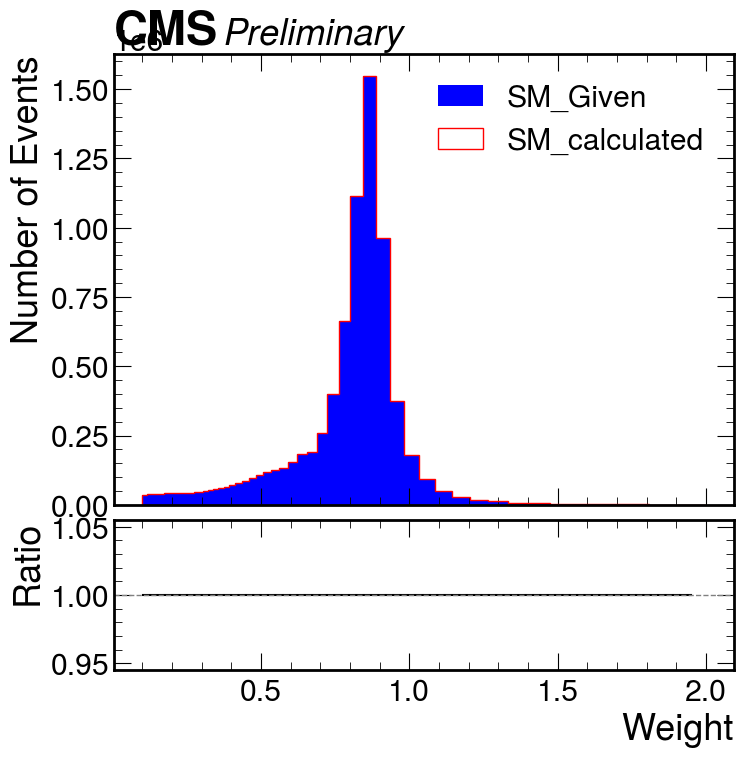

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import mplhep as hep

def plot_weight_validation(weight_data_dict, bins_space=(0.1, 2), n_bins=60):
    """
    Plot two weight histograms and their ratio on a log x-axis.

    Parameters:
    - weight_data_dict: Dictionary with exactly two items {label: weights_array}.
    - bins_space: (min, max) range for x-axis.
    - n_bins: Number of bins.
    """
    assert len(weight_data_dict) == 2, "Provide exactly two weight datasets for comparison."

    # Extract the two datasets
    labels = list(weight_data_dict.keys())
    w1, w2 = weight_data_dict[labels[0]], weight_data_dict[labels[1]]

    # Define log-spaced bins
    bins = np.logspace(np.log10(bins_space[0]), np.log10(bins_space[1]), n_bins)

    # Histogram the weights
    hist1, _ = np.histogram(w1, bins=bins)
    hist2, _ = np.histogram(w2, bins=bins)

    # Midpoints for plotting
    bin_centers = 0.5 * (bins[:-1] + bins[1:])
    bin_widths = np.diff(bins)

    # Convert to NumPy arrays (in case they are awkward Arrays)
    hist1 = np.asarray(hist1)
    hist2 = np.asarray(hist2)

    with np.errstate(divide='ignore', invalid='ignore'):
        ratio = np.divide(hist1, hist2)
        ratio[~np.isfinite(ratio)] = 0  # set NaN/inf to zero


    # Use CMS style
    plt.style.use(hep.style.CMS)

    # Create figure with ratio subplot
    fig = plt.figure(figsize=(8, 8))
    gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1], hspace=0.05)

    ax_main = fig.add_subplot(gs[0])
    ax_ratio = fig.add_subplot(gs[1], sharex=ax_main)

    # Main plot
    ax_main.hist(w1, bins=bins, histtype='stepfilled', label=labels[0], color='blue')
    ax_main.hist(w2, bins=bins, histtype='step', label=labels[1], color='red')
    ax_main.set_ylabel("Number of Events")
    #ax_main.set_xscale("log")
    ax_main.legend()
    hep.cms.text("Preliminary", ax=ax_main)

    # Ratio plot
    ax_ratio.step(bin_centers, ratio, where="mid", color="black")
    ax_ratio.set_xlabel("Weight")
    ax_ratio.set_ylabel("Ratio")
    #ax_ratio.set_xscale("log")
    ax_ratio.axhline(1.0, linestyle="--", color="gray", linewidth=1)

    plt.setp(ax_main.get_xticklabels(), visible=False)
    plt.show()
    
weight_data_dict = {
    'SM_Given': sm_weight_branch,
    'SM_calculated':sm,       
}
plot_weight_validation(weight_data_dict)

In [14]:
#weight_sm2=file['mgWeights'][:,201]
weight_sm=file['mgWeights'][:,200]
#weight_sm1=file['mgWeights'][:,199]
#weight_sm3=file['mgWeights'][:,198]
weights = file['trueLevelWeight']

In [88]:
observables = {
    'gen_ttbar_mass': file['gen_ttbar_mass'],
    'gen_b1k': file['gen_b1k'],
    'gen_b2k': file['gen_b2k'],
    'gen_b1j': file['gen_b1j'],
    'gen_b2j': file['gen_b2j'],
    'gen_b1r': file['gen_b1r'],
    'gen_b2r': file['gen_b2r'],
    'gen_b1q': file['gen_b1q'],
    'gen_b2q': file['gen_b2q'],
    'gen_b1n': file['gen_b1n'],
    'gen_b2n': file['gen_b2n'],
    'gen_l_pt': file['gen_l_pt'],
    'gen_lbar_pt': file['gen_lbar_pt'],
    'gen_c_kk': file['gen_c_kk'],
    'gen_c_rr': file['gen_c_rr'],
    'gen_c_nn': file['gen_c_nn'],
    'gen_ll_cHel': file['gen_ll_cHel'],
    'gen_crk_ckr': file['gen_c_rk'] + file['gen_c_kr'],
    'gen_eta': file['gen_l_eta'],

    # Newly added ttbar and llbar observables
    'gen_ttbar_pt': file['gen_ttbar_pt'],
    'gen_ttbar_phi': file['gen_ttbar_phi'],
    'gen_ttbar_rapidity': file['gen_ttbar_rapidity'],
    'gen_ttbar_eta': file['gen_ttbar_eta'],
    'gen_ttbar_delta_phi': file['gen_ttbar_delta_phi'],
    'gen_ttbar_delta_eta': file['gen_ttbar_delta_eta'],
    'gen_ttbar_delta_rapidity': file['gen_ttbar_delta_rapidity'],
    'gen_llbar_pt': file['gen_llbar_pt'],
    'gen_llbar_phi': file['gen_llbar_phi'],
    'gen_llbar_rapidity': file['gen_llbar_rapidity'],
    'gen_llbar_delta_phi': file['gen_llbar_delta_phi'],
    'gen_llbar_delta_eta': file['gen_llbar_delta_eta'],
    'gen_llbar_delta_rapidity': file['gen_llbar_delta_rapidity'],
    'gen_llbar_mass': file['gen_llbar_mass'],
}

observables_jason = {
    'gen_ttbar_mass': file_jason['gen_ttbar_mass'],
    'gen_b1k': file_jason['gen_b1k'],
    'gen_b2k': file_jason['gen_b2k'],
    'gen_b1j': file_jason['gen_b1j'],
    'gen_b2j': file_jason['gen_b2j'],
    'gen_b1r': file_jason['gen_b1r'],
    'gen_b2r': file_jason['gen_b2r'],
    'gen_b1q': file_jason['gen_b1q'],
    'gen_b2q': file_jason['gen_b2q'],
    'gen_b1n': file_jason['gen_b1n'],
    'gen_b2n': file_jason['gen_b2n'],
    'gen_l_pt': file_jason['gen_l_pt'],
    'gen_lbar_pt': file_jason['gen_lbar_pt'],
    'gen_c_kk': file_jason['gen_c_kk'],
    'gen_c_rr': file_jason['gen_c_rr'],
    'gen_c_nn': file_jason['gen_c_nn'],
    'gen_ll_cHel': file_jason['gen_ll_cHel'],
    'gen_crk_ckr': file_jason['gen_c_rk'] + file_jason['gen_c_kr'],
    'gen_eta': file_jason['gen_l_eta'],

    # Newly added ttbar and llbar observables
    'gen_ttbar_pt': file_jason['gen_ttbar_pt'],
    'gen_ttbar_phi': file_jason['gen_ttbar_phi'],
    'gen_ttbar_rapidity': file_jason['gen_ttbar_rapidity'],
    'gen_ttbar_eta': file_jason['gen_ttbar_eta'],
    'gen_ttbar_delta_phi': file_jason['gen_ttbar_delta_phi'],
    'gen_ttbar_delta_eta': file_jason['gen_ttbar_delta_eta'],
    'gen_ttbar_delta_rapidity': file_jason['gen_ttbar_delta_rapidity'],
    'gen_llbar_pt': file_jason['gen_llbar_pt'],
    'gen_llbar_phi': file_jason['gen_llbar_phi'],
    'gen_llbar_rapidity': file_jason['gen_llbar_rapidity'],
    'gen_llbar_delta_phi': file_jason['gen_llbar_delta_phi'],
    'gen_llbar_delta_eta': file_jason['gen_llbar_delta_eta'],
    'gen_llbar_delta_rapidity': file_jason['gen_llbar_delta_rapidity'],
    'gen_llbar_mass': file_jason['gen_llbar_mass'],
}

observables_to_plot = {
    # Existing
    'gen_b1k': ('$b_{1k}$', '$b_{1k}$'),
    'gen_b2k': ('$b_{2k}$', '$b_{2k}$'),
    #'gen_b1j': ('$b_{1j}$', '$b_{1j}$'),
    #'gen_b2j': ('$b_{2j}$', '$b_{2j}$'),
    'gen_b1r': ('$b_{1r}$', '$b_{1r}$'),
    'gen_b2r': ('$b_{2r}$', '$b_{2r}$'),
    #'gen_b1q': ('$b_{1q}$', '$b_{1q}$'),
    #'gen_b2q': ('$b_{2q}$', '$b_{2q}$'),
    #'gen_b1n': ('$b_{1n}$', '$b_{1n}$'),
    #'gen_b2n': ('$b_{2n}$', '$b_{2n}$'),
    'gen_c_kk': ('$C_{kk}$', '$C_{kk}$'),
    'gen_c_rr': ('$C_{rr}$', '$C_{rr}$'),
    'gen_c_nn': ('$C_{nn}$', '$C_{nn}$'),
    'gen_ll_cHel': ('$\\cos\\phi$', '$\\cos\\phi$'),
    'gen_crk_ckr': ('$C_{rk}+C_{kr}$', '$C_{rk}+C_{kr}$'),

    # Newly added ttbar observables
    #'gen_ttbar_pt': ('$p_T^{t\\bar{t}}$', '$p_T^{t\\bar{t}}$'),
    #'gen_ttbar_phi': ('$\\phi^{t\\bar{t}}$', '$\\phi^{t\\bar{t}}$'),
    #'gen_ttbar_rapidity': ('$y^{t\\bar{t}}$', '$y^{t\\bar{t}}$'),
    #'gen_ttbar_eta': ('$\\eta^{t\\bar{t}}$', '$\\eta^{t\\bar{t}}$'),
    #'gen_ttbar_delta_phi': ('$\\Delta\\phi_{t\\bar{t}}$', '$\\Delta\\phi_{t\\bar{t}}$'),
    #'gen_ttbar_delta_eta': ('$\\Delta\\eta_{t\\bar{t}}$', '$\\Delta\\eta_{t\\bar{t}}$'),
    #'gen_ttbar_delta_rapidity': ('$\\Delta y_{t\\bar{t}}$', '$\\Delta y_{t\\bar{t}}$'),

    # Newly added llbar observables
    #'gen_llbar_pt': ('$p_T^{\\ell\\bar{\\ell}}$', '$p_T^{\\ell\\bar{\\ell}}$'),
    #'gen_llbar_phi': ('$\\phi^{\\ell\\bar{\\ell}}$', '$\\phi^{\\ell\\bar{\\ell}}$'),
    #'gen_llbar_rapidity': ('$y^{\\ell\\bar{\\ell}}$', '$y^{\\ell\\bar{\\ell}}$'),
    #'gen_llbar_delta_phi': ('$\\Delta\\phi_{\\ell\\bar{\\ell}}$', '$\\Delta\\phi_{\\ell\\bar{\\ell}}$'),
    #'gen_llbar_delta_eta': ('$\\Delta\\eta_{\\ell\\bar{\\ell}}$', '$\\Delta\\eta_{\\ell\\bar{\\ell}}$'),
    #'gen_llbar_delta_rapidity': ('$\\Delta y_{\\ell\\bar{\\ell}}$', '$\\Delta y_{\\ell\\bar{\\ell}}$'),
    #'gen_llbar_mass': ('$m_{\\ell\\bar{\\ell}}$', '$m_{\\ell\\bar{\\ell}}$'),

    # Optional (commented out, add if needed)
    # 'gen_l_pt': ('$p_T^\\ell$', '$p_T^\\ell$'),
    # 'gen_lbar_pt': ('$p_T^{\\bar{\\ell}}$', '$p_T^{\\bar{\\ell}}$'),
    # 'gen_eta': ('$\\eta^\\ell$', '$\\eta^\\ell$'),
    # 'gen_ttbar_mass': ('$m_{t\\bar{t}}$', '$m_{t\\bar{t}}$'),
}


# Apply pt > 1 GeV cut consistently
mask_file = (observables['gen_l_pt'] > 1) & (observables['gen_lbar_pt'] > 1)
mask_jason=(observables_jason['gen_l_pt'] > 1 ) & (observables_jason['gen_lbar_pt'] > 1)

# Define weights dynamically after applying the mask
weights_dict = {
    'reweighted_SM': weight_sm[mask_file] # SM weights from existing data
    #'ctgRe=-2': weight_ctg[mask],
    #'ctgRe=10': weight_ctgRe_10[mask],
}

# Apply the same mask to filter all observables
filtered_observables = {key: val[mask_file] for key, val in observables.items()}
filtered_observables_jason = {key: val for key, val in observables_jason.items()}

def compute_sf_event(obs_key, reco_dict, truth_dict, base_weights, bins=6):
    reco = ak.to_numpy(reco_dict[obs_key])
    truth = ak.to_numpy(truth_dict[obs_key])
    base_weights_np = ak.to_numpy(base_weights)

    bin_edges = np.linspace(min(np.min(reco), np.min(truth)),
                            max(np.max(reco), np.max(truth)), bins + 1)

    hist_reco, _ = np.histogram(reco, bins=bin_edges, weights=base_weights_np)
    hist_truth, _ = np.histogram(truth, bins=bin_edges)

    sf = np.divide(
        hist_truth,
        hist_reco,
        out=np.ones_like(hist_truth, dtype=float),
        where=hist_reco != 0
    )

    bin_indices = np.digitize(reco, bin_edges) - 1
    bin_indices = np.clip(bin_indices, 0, len(sf) - 1)
    sf_event = sf[bin_indices]
    return sf_event

# Starting base weight
base_weight = weight_sm[mask_file]

# Orders to evaluate
orders = {
    "Order A": ['gen_b2k', 'gen_ll_cHel', 'gen_b1k', 'gen_b2r', 'gen_c_nn', 'gen_b1r', 'gen_c_kk', 'gen_c_rr'],
    "Order B": ['gen_b1k', 'gen_b2k', 'gen_b1r', 'gen_b2r', 'gen_c_kk', 'gen_c_rr', 'gen_c_nn', 'gen_ll_cHel'],
    "Order C": ['gen_b1k', 'gen_b2k', 'gen_b2r', 'gen_ll_cHel', 'gen_c_kk', 'gen_c_rr', 'gen_b1r', 'gen_c_nn']
}

# Compute cumulative weights for each order
cumulative_weights = {}

for label, obs_order in orders.items():
    w = ak.to_numpy(base_weight).copy()
    for obs in obs_order:
        sf_event = compute_sf_event(obs, filtered_observables, filtered_observables_jason, w)
        w *= sf_event
    cumulative_weights[label] = w
    


In [89]:
cumulative_weights

{'Order A': array([1.5497985 , 1.1516248 , 1.3997576 , ..., 0.01989184, 0.01684014,
        0.01514454], dtype=float32),
 'Order B': array([1.5653254 , 1.1513891 , 1.4010668 , ..., 0.01995797, 0.01680824,
        0.01506946], dtype=float32),
 'Order C': array([1.5574108 , 1.1505586 , 1.402634  , ..., 0.0199406 , 0.01683846,
        0.01511458], dtype=float32)}

In [98]:
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep

def plot_corrected_observables_dict(obs_dict, sm_ref, xlabel, title, weights_dict, num_bins=6):
    fig, (ax, ax_ratio) = plt.subplots(2, 1, figsize=(12, 8),
                                       gridspec_kw={'height_ratios': [3, 1]}, sharex=True)

    # Bin edges and binning setup
    min_val = float(min(np.min(obs_dict), np.min(sm_ref)))
    max_val = float(max(np.max(obs_dict), np.max(sm_ref)))
    bin_edges = np.linspace(min_val, max_val, num_bins + 1)
    bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
    bin_widths = np.diff(bin_edges)

    # Compute reference histogram (true SM, unweighted)
    counts_ref, _ = np.histogram(sm_ref, bins=bin_edges)
    norm_ref = np.sum(counts_ref) or 1
    density_ref = counts_ref / (norm_ref * bin_widths)

    plt.style.use(hep.style.CMS)

    # Plot true SM
    ax.hist(sm_ref, bins=bin_edges, histtype='step', linestyle='dashed',
            label="SM (True)", color='black', density=True)

    # For each reweighted scheme
    for label, weights in weights_dict.items():
        # Histogram with weights
        counts_alt, _ = np.histogram(obs_dict, bins=bin_edges, weights=np.asarray(weights))
        norm_alt = np.sum(counts_alt) or 1
        density_alt = counts_alt / (norm_alt * bin_widths)

        # Compute and plot ratio
        ref_np = np.asarray(density_ref)
        alt_np = np.asarray(density_alt)
        ratio = np.divide(alt_np, ref_np, out=np.ones_like(ref_np), where=ref_np != 0)

        ax.hist(obs_dict, bins=bin_edges, weights=np.asarray(weights),
                histtype='step', label=f"Reweighted ({label})", density=True)

        ax_ratio.step(bin_centers, ratio, where='mid', label=f"{label} / SM")

    # Bin-wise printout
    print(f"\n=== {title} ===")
    print(f"{'Bin':<8} {'Range':<20} {'SM':<12} " + " ".join([f"{label:<15}" for label in weights_dict]))
    for i in range(num_bins):
        bin_range = f"[{bin_edges[i]:.2f}, {bin_edges[i+1]:.2f})"
        ref_val = density_ref[i]
        alt_vals = []
        ratios = []
        for label, weights in weights_dict.items():
            counts_alt, _ = np.histogram(obs_dict, bins=bin_edges, weights=np.asarray(weights))
            norm_alt = np.sum(counts_alt) or 1
            density_alt = counts_alt / (norm_alt * bin_widths)
            alt_vals.append(density_alt[i])
            ratio_val = density_alt[i] / ref_val if ref_val != 0 else np.nan
            ratios.append(ratio_val)

        print(f"{i:<8} {bin_range:<20} {ref_val:<12.5f} " + " ".join([f"{val:<12.5f}" for val in alt_vals]))
        print(f"{'':<8} {'':<20} {'':<12} " + " ".join([f"(ratio: {r:<6.3f})" for r in ratios]))

    # Final plot formatting
    ax.set_ylabel("Normalized Events")
    ax.set_title(title)
    ax.legend(loc='best')
    ax_ratio.set_ylim(0.95, 1.05)
    ax_ratio.set_xlabel(xlabel)
    ax_ratio.set_ylabel("Ratio to SM")
    ax_ratio.axhline(1, color='gray', linestyle='--', linewidth=1)
    ax_ratio.legend(loc='center left', bbox_to_anchor=(1.02, 0.5))

    plt.tight_layout()
    plt.show()



=== $b_{1k}$ ===
Bin      Range                SM           Order A         Order B         Order C        
0        [-1.00, -0.67)       0.49738      0.49740      0.49887      0.49846     
                                           (ratio: 1.000 ) (ratio: 1.003 ) (ratio: 1.002 )
1        [-0.67, -0.33)       0.49918      0.49939      0.50031      0.50039     
                                           (ratio: 1.000 ) (ratio: 1.002 ) (ratio: 1.002 )
2        [-0.33, 0.00)        0.49916      0.49917      0.49942      0.49974     
                                           (ratio: 1.000 ) (ratio: 1.001 ) (ratio: 1.001 )
3        [0.00, 0.33)         0.50086      0.50082      0.50050      0.50083     
                                           (ratio: 1.000 ) (ratio: 0.999 ) (ratio: 1.000 )
4        [0.33, 0.67)         0.50188      0.50193      0.50109      0.50117     
                                           (ratio: 1.000 ) (ratio: 0.998 ) (ratio: 0.999 )
5        [0.67, 1.00)     

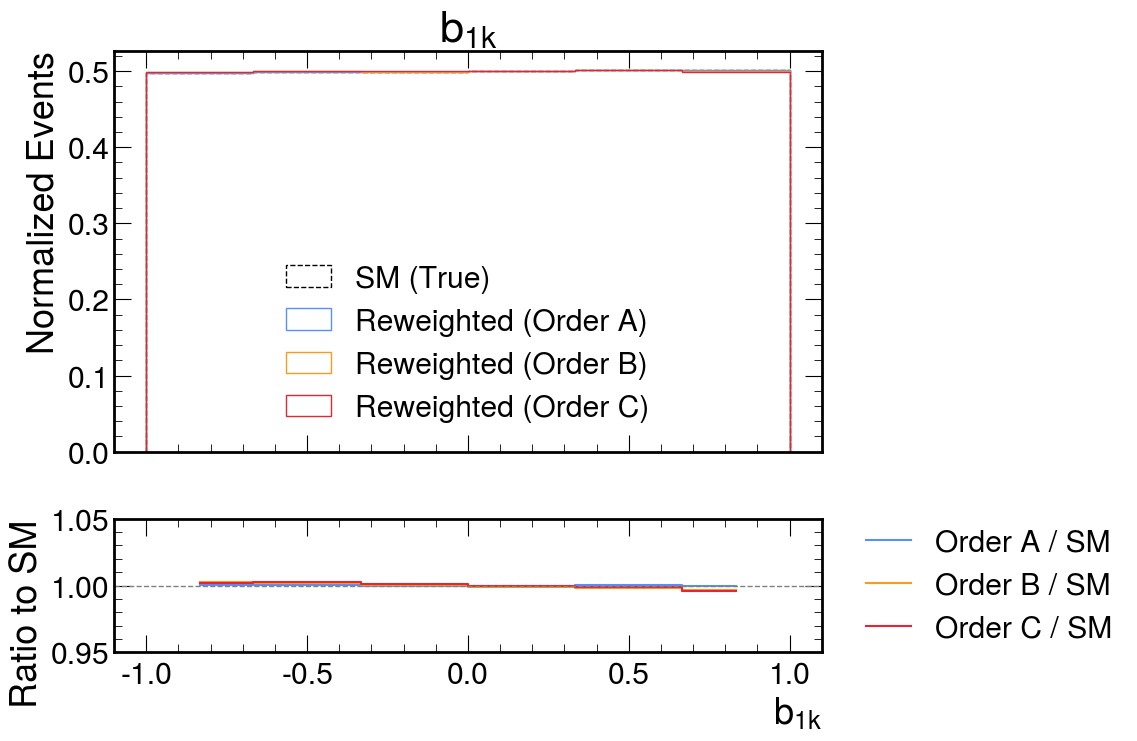


=== $b_{2k}$ ===
Bin      Range                SM           Order A         Order B         Order C        
0        [-1.00, -0.67)       0.49762      0.49891      0.49748      0.49698     
                                           (ratio: 1.003 ) (ratio: 1.000 ) (ratio: 0.999 )
1        [-0.67, -0.33)       0.49856      0.49970      0.49885      0.49895     
                                           (ratio: 1.002 ) (ratio: 1.001 ) (ratio: 1.001 )
2        [-0.33, 0.00)        0.49966      0.50006      0.49973      0.50011     
                                           (ratio: 1.001 ) (ratio: 1.000 ) (ratio: 1.001 )
3        [0.00, 0.33)         0.50117      0.50090      0.50117      0.50156     
                                           (ratio: 0.999 ) (ratio: 1.000 ) (ratio: 1.001 )
4        [0.33, 0.67)         0.50073      0.50002      0.50089      0.50100     
                                           (ratio: 0.999 ) (ratio: 1.000 ) (ratio: 1.001 )
5        [0.67, 1.00)     

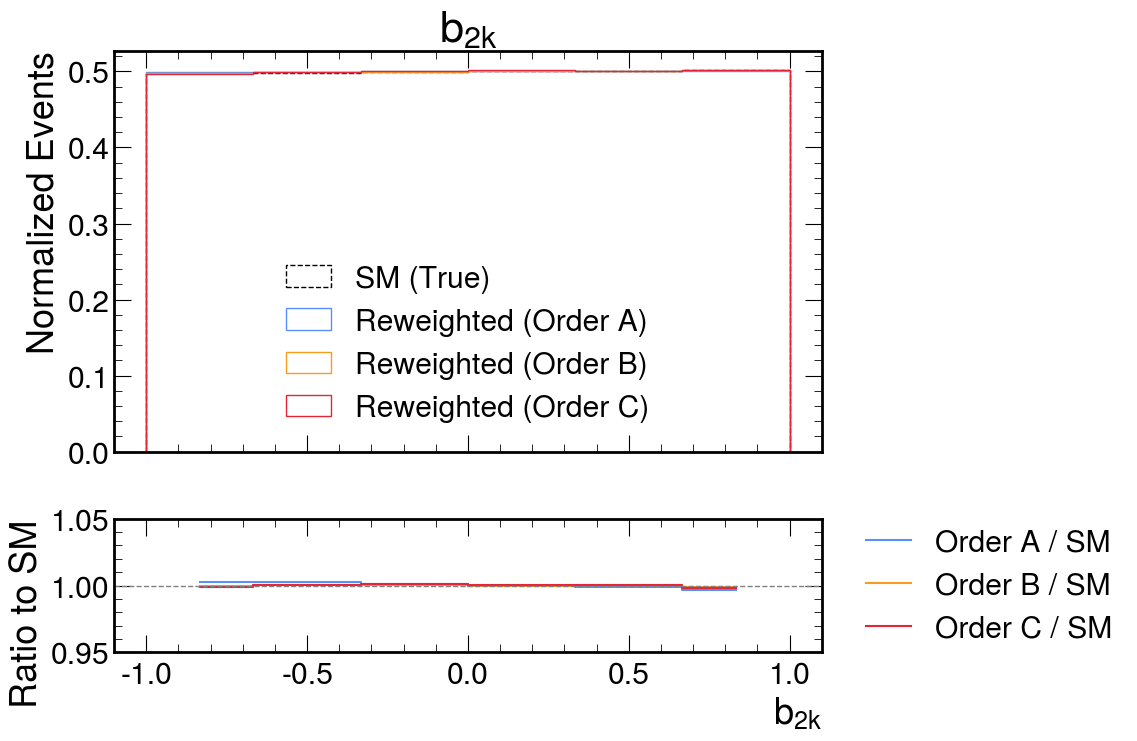


=== $b_{1r}$ ===
Bin      Range                SM           Order A         Order B         Order C        
0        [-1.00, -0.67)       0.49906      0.49902      0.49896      0.49931     
                                           (ratio: 1.000 ) (ratio: 1.000 ) (ratio: 1.001 )
1        [-0.67, -0.33)       0.49901      0.49892      0.49905      0.49898     
                                           (ratio: 1.000 ) (ratio: 1.000 ) (ratio: 1.000 )
2        [-0.33, -0.00)       0.49996      0.50010      0.50008      0.49973     
                                           (ratio: 1.000 ) (ratio: 1.000 ) (ratio: 1.000 )
3        [-0.00, 0.33)        0.50028      0.50041      0.50038      0.50004     
                                           (ratio: 1.000 ) (ratio: 1.000 ) (ratio: 1.000 )
4        [0.33, 0.67)         0.50063      0.50055      0.50065      0.50062     
                                           (ratio: 1.000 ) (ratio: 1.000 ) (ratio: 1.000 )
5        [0.67, 1.00)     

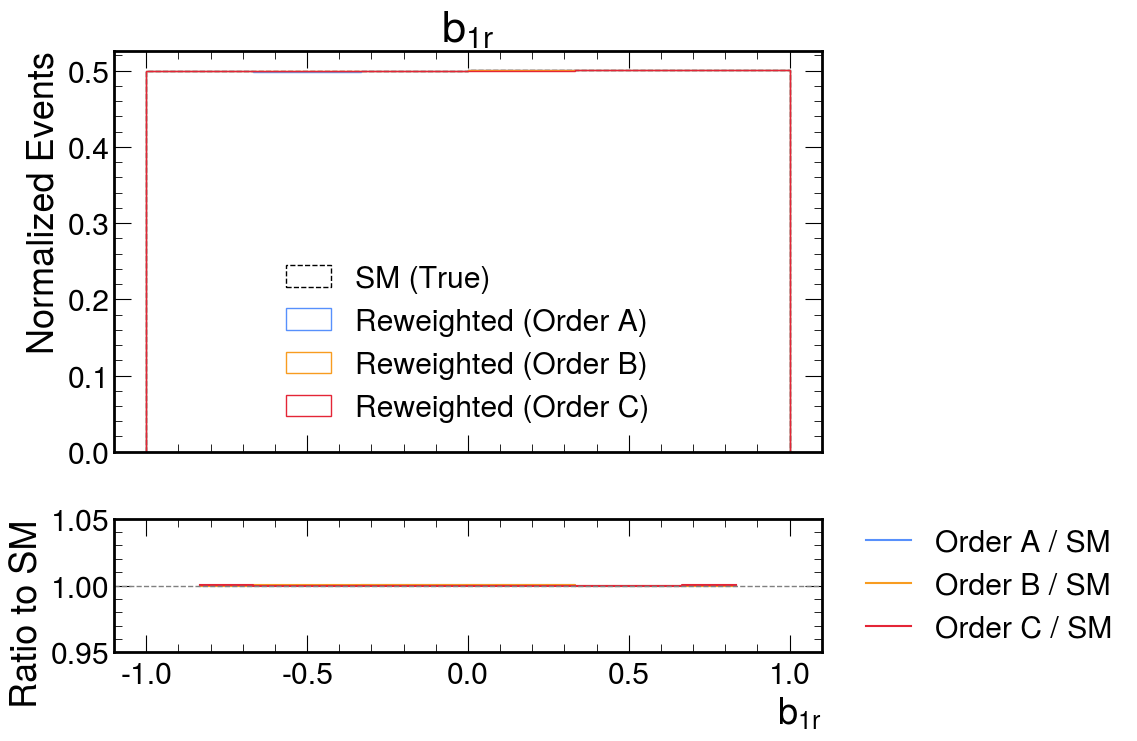


=== $b_{2r}$ ===
Bin      Range                SM           Order A         Order B         Order C        
0        [-1.00, -0.67)       0.49939      0.49976      0.49928      0.49987     
                                           (ratio: 1.001 ) (ratio: 1.000 ) (ratio: 1.001 )
1        [-0.67, -0.33)       0.49961      0.49944      0.49966      0.49962     
                                           (ratio: 1.000 ) (ratio: 1.000 ) (ratio: 1.000 )
2        [-0.33, 0.00)        0.49958      0.49933      0.49970      0.49918     
                                           (ratio: 1.000 ) (ratio: 1.000 ) (ratio: 0.999 )
3        [0.00, 0.33)         0.50000      0.49976      0.50009      0.49956     
                                           (ratio: 1.000 ) (ratio: 1.000 ) (ratio: 0.999 )
4        [0.33, 0.67)         0.50068      0.50055      0.50069      0.50063     
                                           (ratio: 1.000 ) (ratio: 1.000 ) (ratio: 1.000 )
5        [0.67, 1.00)     

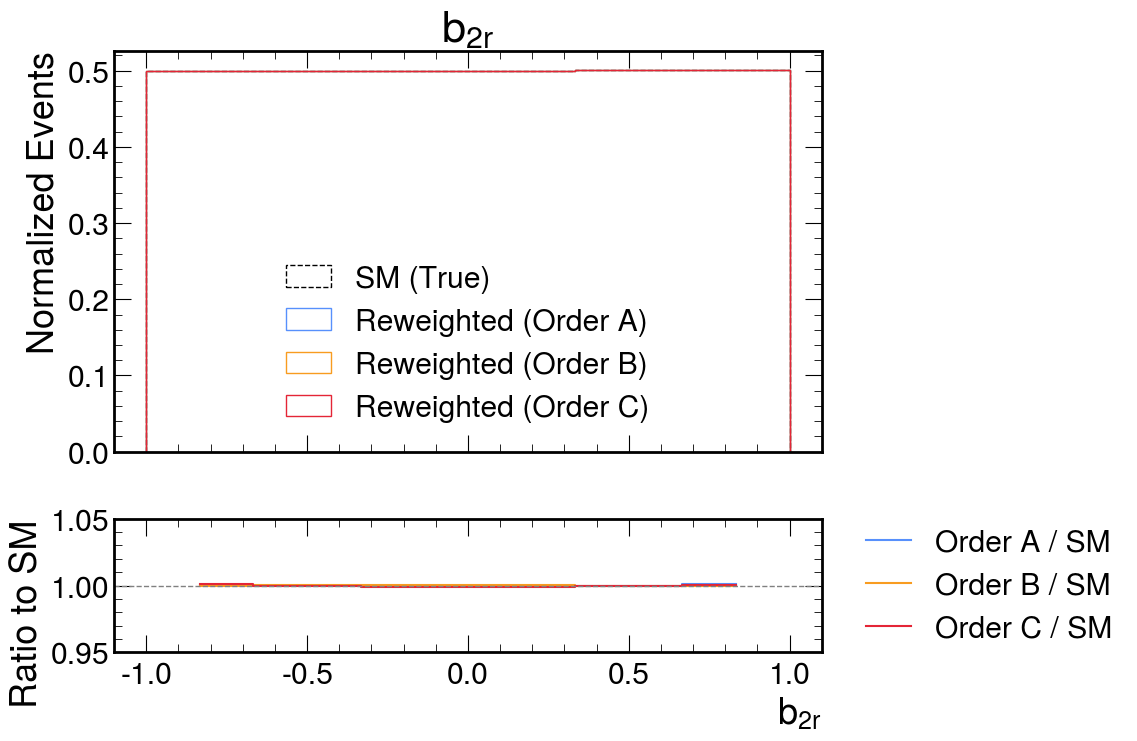


=== $C_{kk}$ ===
Bin      Range                SM           Order A         Order B         Order C        
0        [-1.00, -0.67)       0.11707      0.11708      0.11715      0.11678     
                                           (ratio: 1.000 ) (ratio: 1.001 ) (ratio: 0.997 )
1        [-0.67, -0.33)       0.40767      0.40765      0.40841      0.40733     
                                           (ratio: 1.000 ) (ratio: 1.002 ) (ratio: 0.999 )
2        [-0.33, -0.00)       1.09039      1.09040      1.09083      1.09100     
                                           (ratio: 1.000 ) (ratio: 1.000 ) (ratio: 1.001 )
3        [-0.00, 0.33)        1.00977      1.00978      1.00939      1.01027     
                                           (ratio: 1.000 ) (ratio: 1.000 ) (ratio: 1.000 )
4        [0.33, 0.67)         0.30437      0.30436      0.30383      0.30409     
                                           (ratio: 1.000 ) (ratio: 0.998 ) (ratio: 0.999 )
5        [0.67, 1.00)     

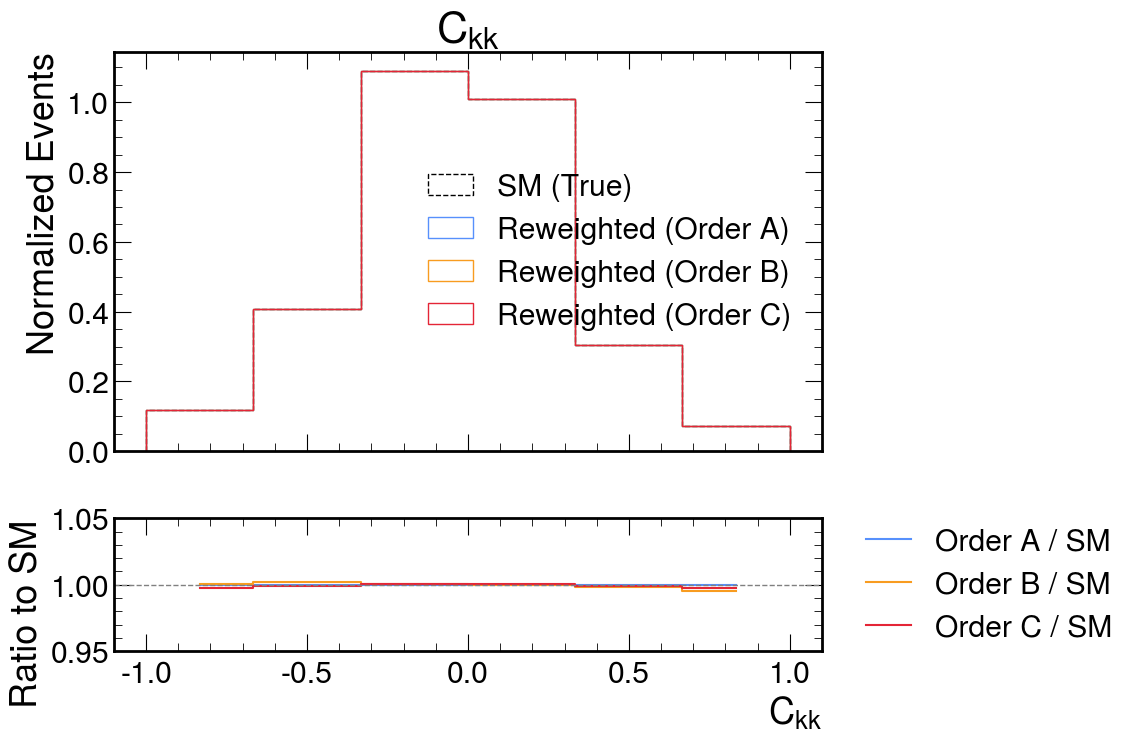


=== $C_{rr}$ ===
Bin      Range                SM           Order A         Order B         Order C        
0        [-1.00, -0.67)       0.09775      0.09775      0.09782      0.09803     
                                           (ratio: 1.000 ) (ratio: 1.001 ) (ratio: 1.003 )
1        [-0.67, -0.33)       0.36331      0.36331      0.36397      0.36405     
                                           (ratio: 1.000 ) (ratio: 1.002 ) (ratio: 1.002 )
2        [-0.33, 0.00)        1.05688      1.05688      1.05738      1.05590     
                                           (ratio: 1.000 ) (ratio: 1.000 ) (ratio: 0.999 )
3        [0.00, 0.33)         1.04239      1.04239      1.04219      1.04140     
                                           (ratio: 1.000 ) (ratio: 1.000 ) (ratio: 0.999 )
4        [0.33, 0.67)         0.34913      0.34913      0.34853      0.34981     
                                           (ratio: 1.000 ) (ratio: 0.998 ) (ratio: 1.002 )
5        [0.67, 1.00)     

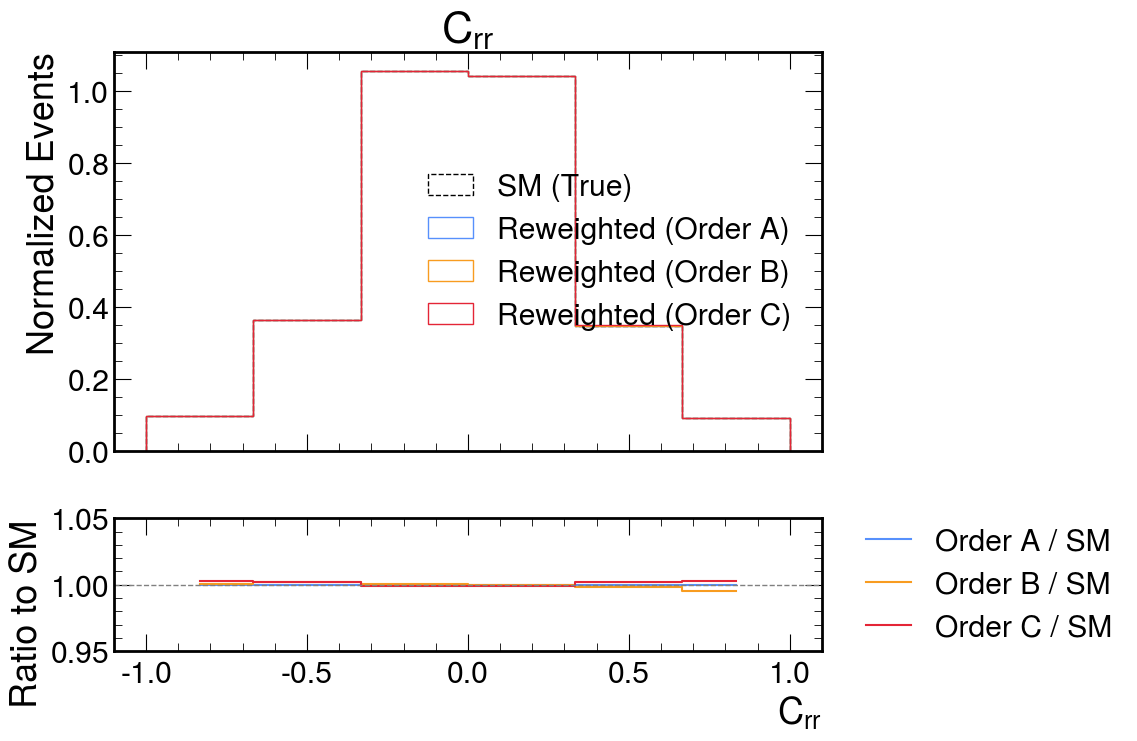


=== $C_{nn}$ ===
Bin      Range                SM           Order A         Order B         Order C        
0        [-1.00, -0.67)       0.11826      0.11800      0.11834      0.11826     
                                           (ratio: 0.998 ) (ratio: 1.001 ) (ratio: 1.000 )
1        [-0.67, -0.33)       0.41000      0.40962      0.41068      0.41000     
                                           (ratio: 0.999 ) (ratio: 1.002 ) (ratio: 1.000 )
2        [-0.33, 0.00)        1.09317      1.09365      1.09367      1.09317     
                                           (ratio: 1.000 ) (ratio: 1.000 ) (ratio: 1.000 )
3        [0.00, 0.33)         1.00505      1.00559      1.00475      1.00505     
                                           (ratio: 1.001 ) (ratio: 1.000 ) (ratio: 1.000 )
4        [0.33, 0.67)         0.30272      0.30249      0.30212      0.30272     
                                           (ratio: 0.999 ) (ratio: 0.998 ) (ratio: 1.000 )
5        [0.67, 1.00)     

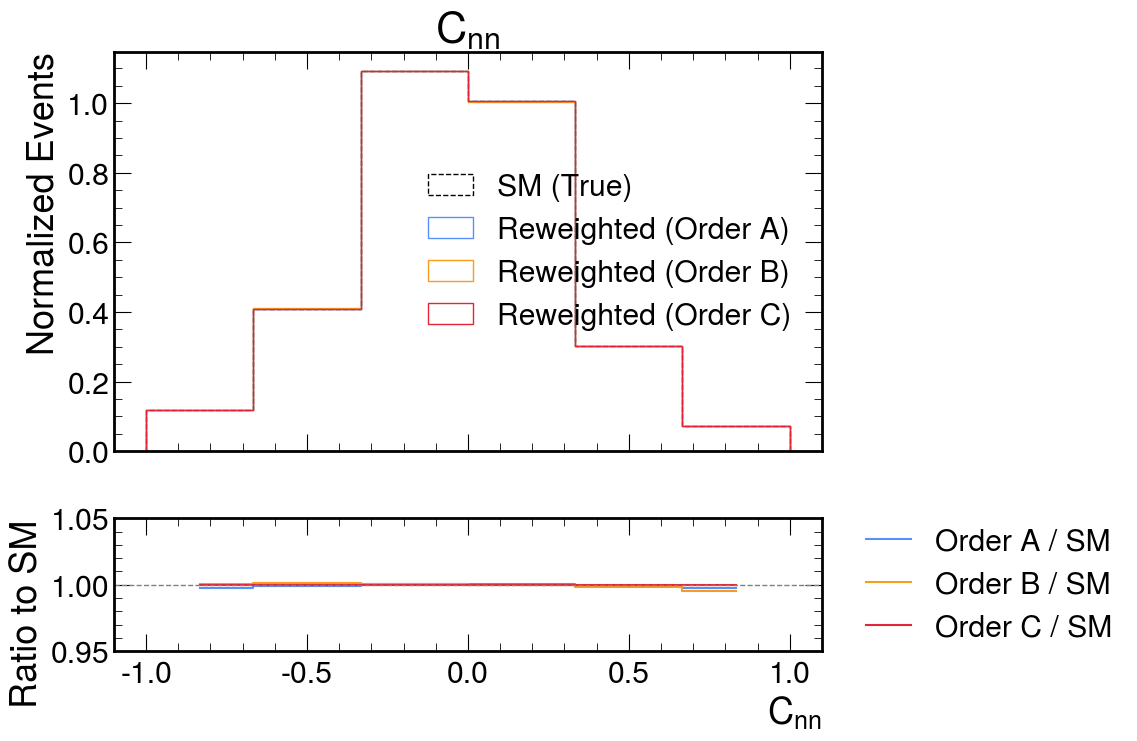


=== $\cos\phi$ ===
Bin      Range                SM           Order A         Order B         Order C        
0        [-1.00, -0.67)       0.40775      0.40707      0.40775      0.40733     
                                           (ratio: 0.998 ) (ratio: 1.000 ) (ratio: 0.999 )
1        [-0.67, -0.33)       0.44417      0.44402      0.44417      0.44395     
                                           (ratio: 1.000 ) (ratio: 1.000 ) (ratio: 1.000 )
2        [-0.33, -0.00)       0.48179      0.48193      0.48179      0.48171     
                                           (ratio: 1.000 ) (ratio: 1.000 ) (ratio: 1.000 )
3        [-0.00, 0.33)        0.51847      0.51859      0.51847      0.51833     
                                           (ratio: 1.000 ) (ratio: 1.000 ) (ratio: 1.000 )
4        [0.33, 0.67)         0.55567      0.55588      0.55567      0.55578     
                                           (ratio: 1.000 ) (ratio: 1.000 ) (ratio: 1.000 )
5        [0.67, 1.00)   

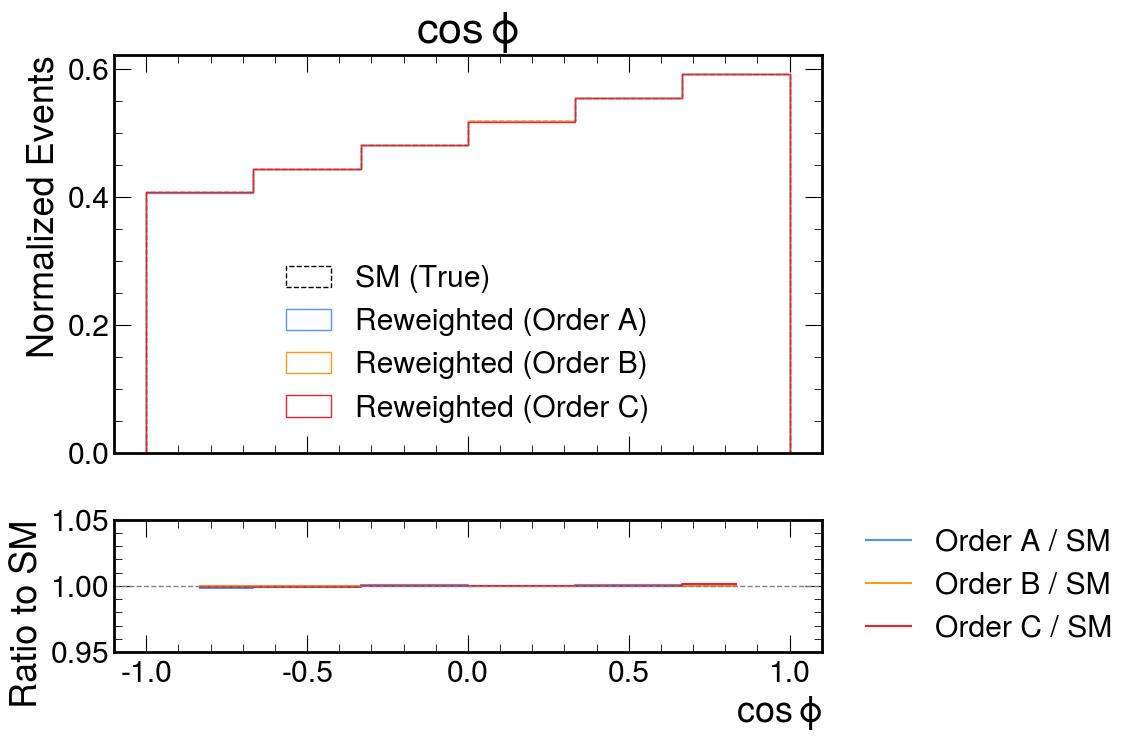


=== $C_{rk}+C_{kr}$ ===
Bin      Range                SM           Order A         Order B         Order C        
0        [-1.00, -0.67)       0.25455      0.25236      0.25236      0.25218     
                                           (ratio: 0.991 ) (ratio: 0.991 ) (ratio: 0.991 )
1        [-0.67, -0.33)       0.49540      0.49411      0.49409      0.49398     
                                           (ratio: 0.997 ) (ratio: 0.997 ) (ratio: 0.997 )
2        [-0.33, 0.00)        0.68937      0.68944      0.68946      0.68976     
                                           (ratio: 1.000 ) (ratio: 1.000 ) (ratio: 1.001 )
3        [0.00, 0.33)         0.71290      0.71354      0.71355      0.71387     
                                           (ratio: 1.001 ) (ratio: 1.001 ) (ratio: 1.001 )
4        [0.33, 0.67)         0.54803      0.54977      0.54975      0.54963     
                                           (ratio: 1.003 ) (ratio: 1.003 ) (ratio: 1.003 )
5        [0.67, 1.0

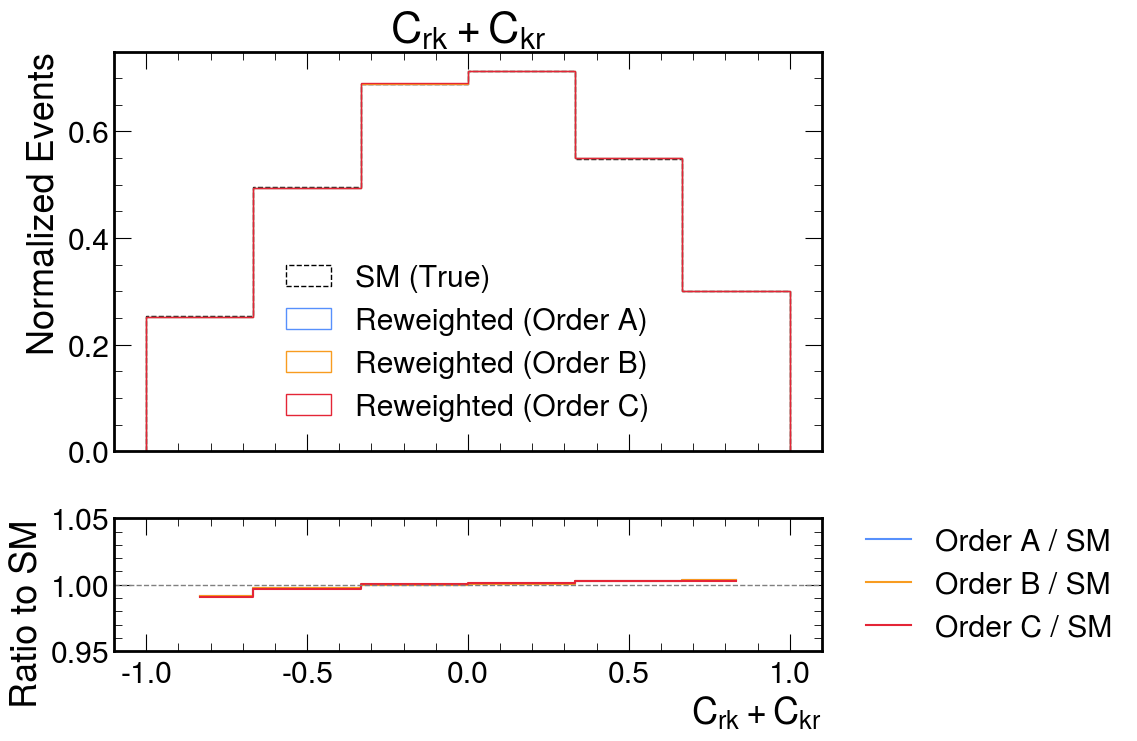

In [117]:
for obs_key, (xlabel, title) in observables_to_plot.items():
    plot_corrected_observables_dict(
        filtered_observables[obs_key],
        filtered_observables_jason[obs_key],
        xlabel,
        title,
        weights_dict=cumulative_weights  # must contain {"label1": weight_array1, ...}
    )


/tmp/ipykernel_2216/415855369.py:68: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


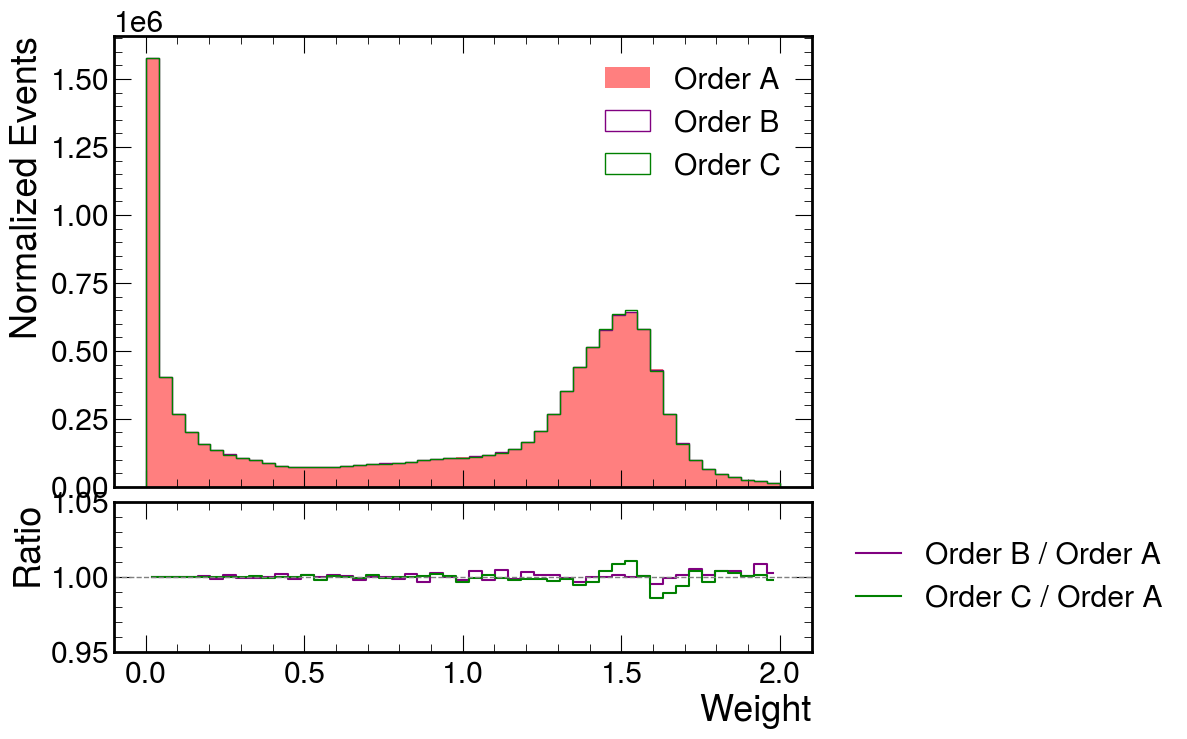

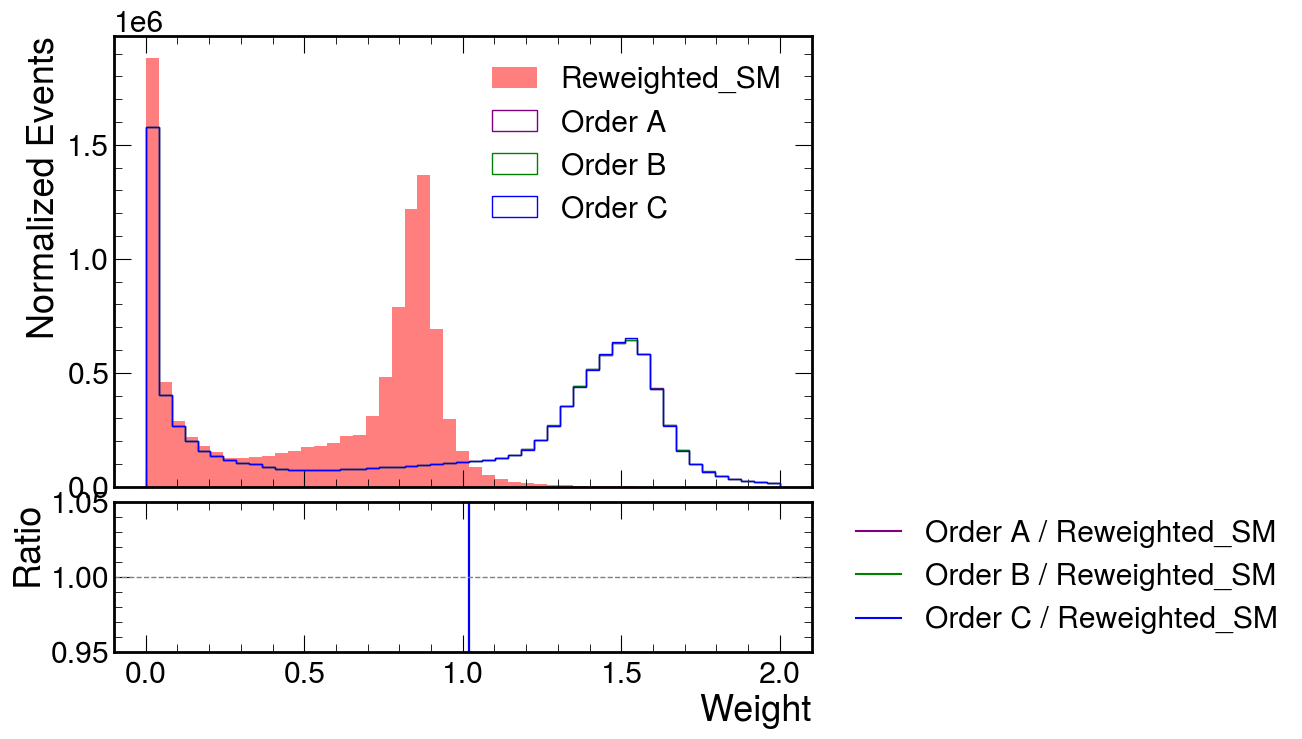

In [104]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import mplhep as hep

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import mplhep as hep

def plot_weight_comparisons(weight_dict, bins_space=(0, 2), n_bins=50):
    """
    Generalized weight comparison plot.
    
    Parameters:
    - weight_dict: Ordered dictionary or dict-like {label: weight_array}
      The first entry is used as the reference.
    - bins_space: Tuple defining the range of histogram bins.
    - n_bins: Number of bins.
    """
    assert len(weight_dict) >= 2, "Provide at least two weight vectors to compare."

    labels = list(weight_dict.keys())
    weights = [np.asarray(weight_dict[label]) for label in labels]

    ref_label = labels[0]
    ref_weights = weights[0]

    bins = np.linspace(bins_space[0], bins_space[1], n_bins)
    bin_centers = 0.5 * (bins[:-1] + bins[1:])

    hist_ref, _ = np.histogram(ref_weights, bins=bins)
    hist_ref = hist_ref / np.sum(hist_ref)

    # CMS style
    plt.style.use(hep.style.CMS)
    fig = plt.figure(figsize=(9, 8))
    gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1], hspace=0.05)
    ax_main = fig.add_subplot(gs[0])
    ax_ratio = fig.add_subplot(gs[1], sharex=ax_main)

    # Plot reference
    ax_main.hist(ref_weights, bins=bins, histtype='stepfilled',
                 label=ref_label, color='red', alpha=0.5)

    # Plot all others
    colors = ['purple', 'green', 'blue']
    for i, (label, weight_array) in enumerate(zip(labels[1:], weights[1:])):
        hist, _ = np.histogram(weight_array, bins=bins)
        hist = hist / np.sum(hist)
        ax_main.hist(weight_array, bins=bins, histtype='step', label=label, color=colors[i % len(colors)])
        
        # Ratio plot
        with np.errstate(divide='ignore', invalid='ignore'):
            ratio = np.divide(hist, hist_ref)
            ratio[~np.isfinite(ratio)] = 0
        ax_ratio.step(bin_centers, ratio, where='mid', label=f"{label} / {ref_label}", color=colors[i % len(colors)])

    ax_main.set_ylabel("Normalized Events")
    ax_main.legend()
    ax_ratio.axhline(1.0, linestyle="--", color="gray", linewidth=1)
    ax_ratio.set_ylabel("Ratio")
    ax_ratio.set_xlabel("Weight")
    ax_ratio.set_ylim(0.95, 1.05)
    ax_ratio.legend(loc='center left', bbox_to_anchor=(1.02, 0.5))

    plt.setp(ax_main.get_xticklabels(), visible=False)
    plt.tight_layout()
    plt.show()

weight_dictionary1={
    "Order A": cumulative_weights["Order A"],
    "Order B": cumulative_weights["Order B"],
    "Order C": cumulative_weights["Order C"]}
weight_dictionary2={
    "Reweighted_SM": base_weight,
    "Order A": cumulative_weights["Order A"],
    "Order B": cumulative_weights["Order B"],
    "Order C": cumulative_weights["Order C"]}
plot_weight_comparisons(weight_dictionary)
plot_weight_comparisons(weight_dictionary2)


In [111]:
#obtain the event weight at ctgRe=15
import Event_weight_prediction1
#compute event weight for your desired WC value
wc_name =['ctGRe', 'ctGIm', 'cQj18', 'cQj38', 'cQj11', 'cQj31', 'ctu8', 'ctd8', 'ctj8', 'cQu8', 'cQd8', 'ctu1', 'ctd1', 'ctj1', 'cQu1', 'cQd1']   
ctgRe2 = [2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0] #ctgRe=2
sm=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0] #sm
ctgRe_neg2 = [-2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
ctgRe_neg2_ctu8_neg2 = [-2,0,0,0,0,0,-2,0,0,0,0,0,0,0,0,0]
ctgRe15=[15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
ctgIm15=[0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
ctgRe1 = [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

sm,sm_linear,sm_quad,sm_total=Event_weight_prediction1.event_weights_lin_quad(structure_constants_all, sm)
sm, ctgRe15_lin, ctgRe15_quad, ctgRe15_total = Event_weight_prediction1.event_weights_lin_quad(structure_constants_all, ctgRe15)

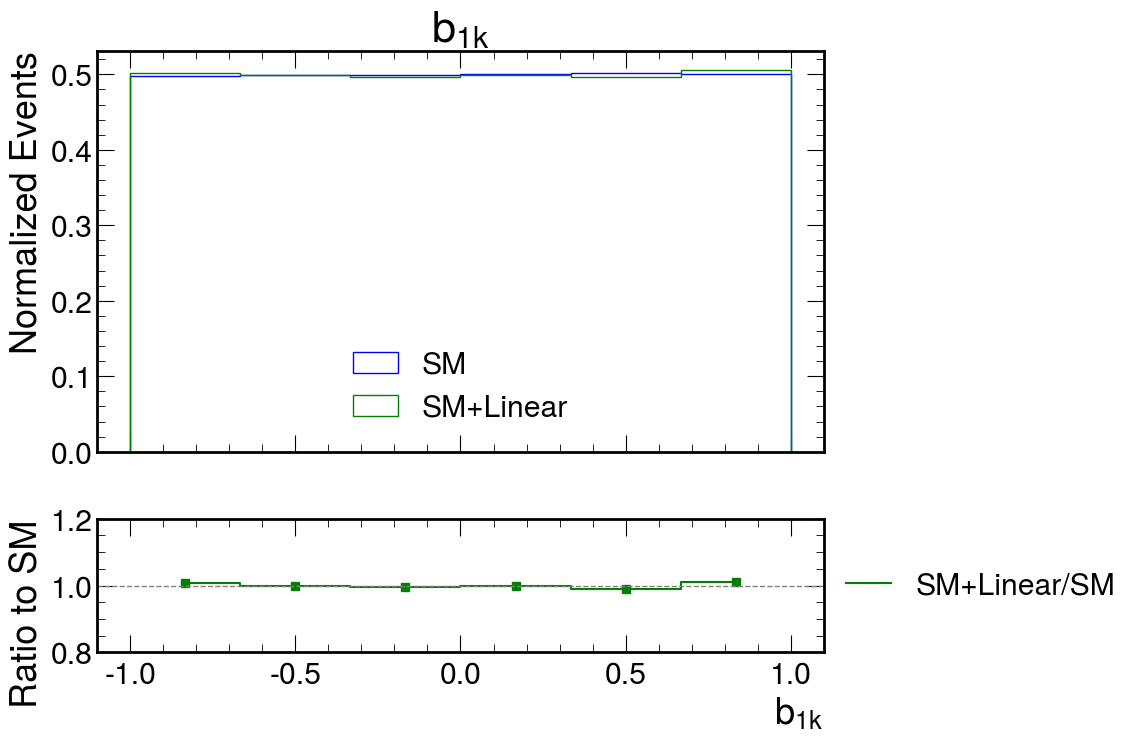

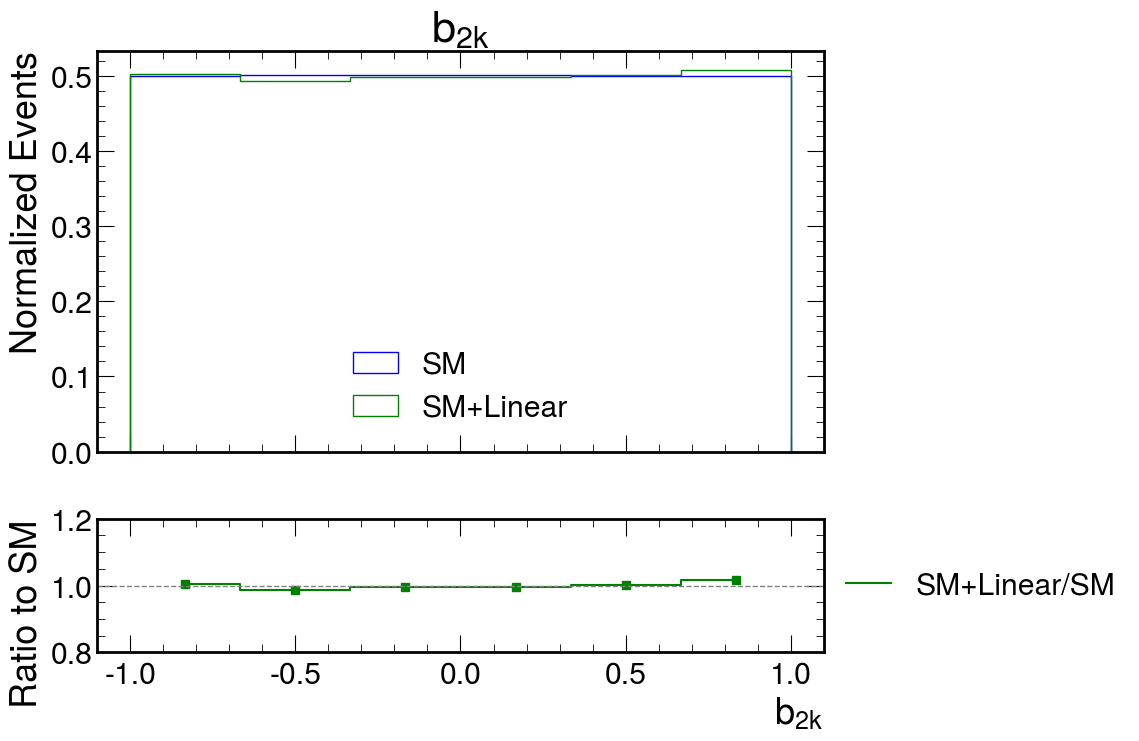

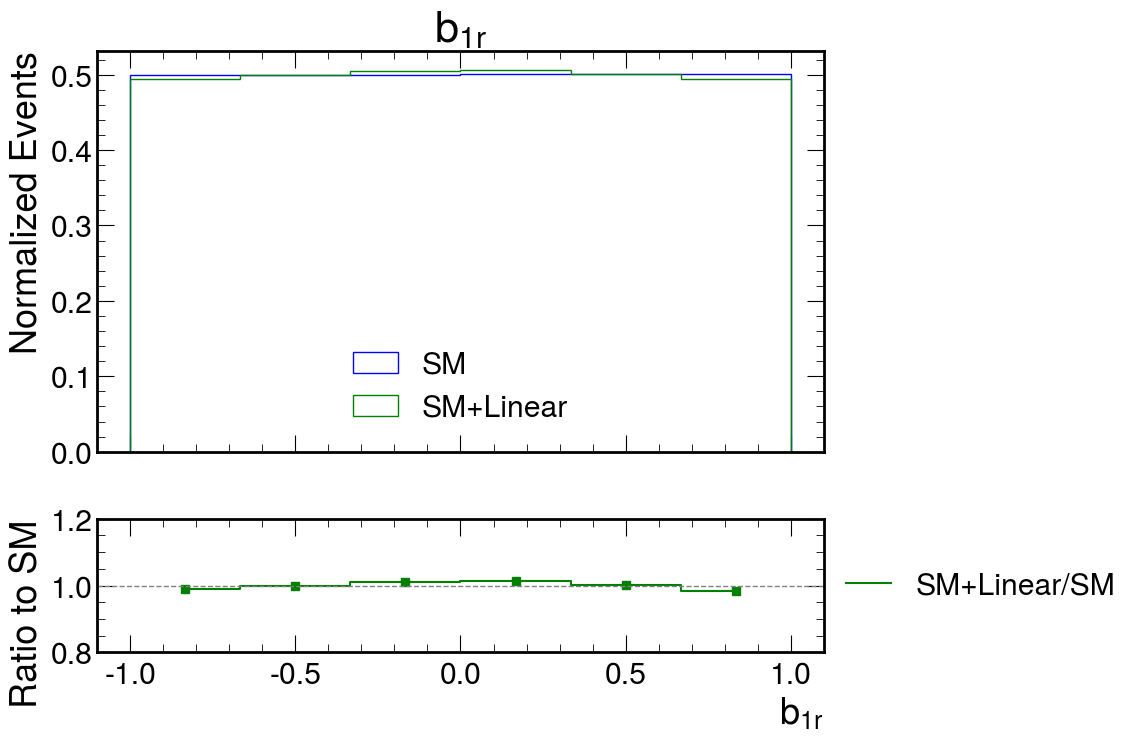

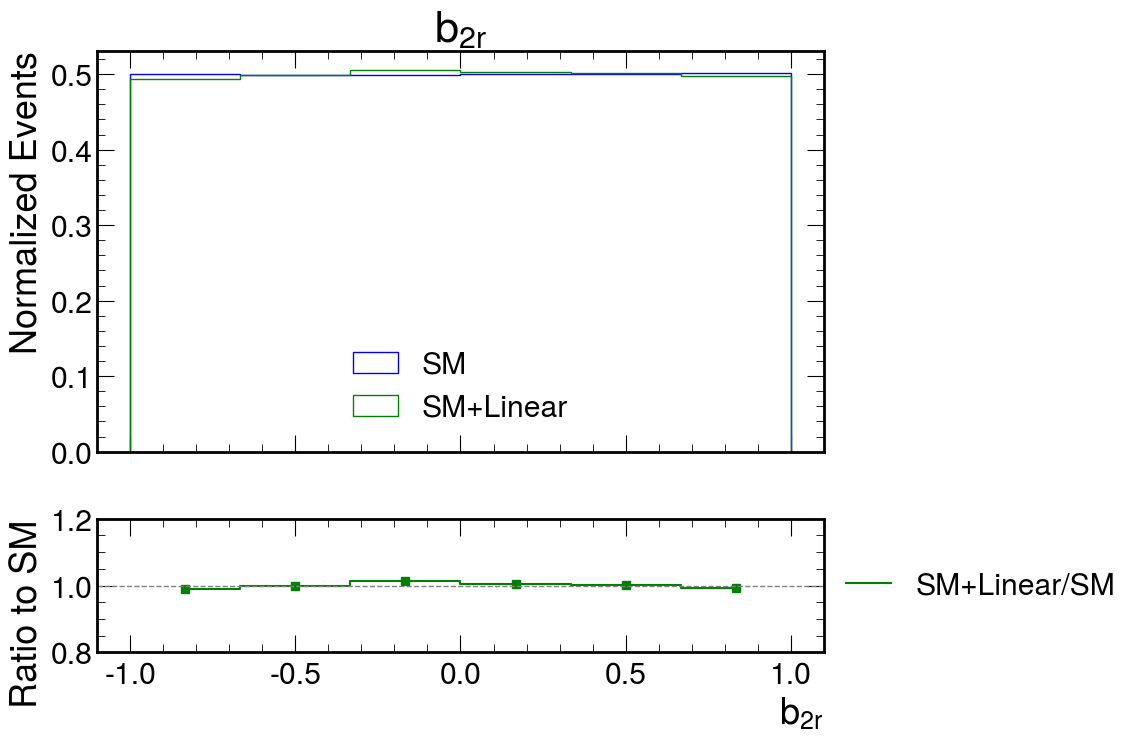

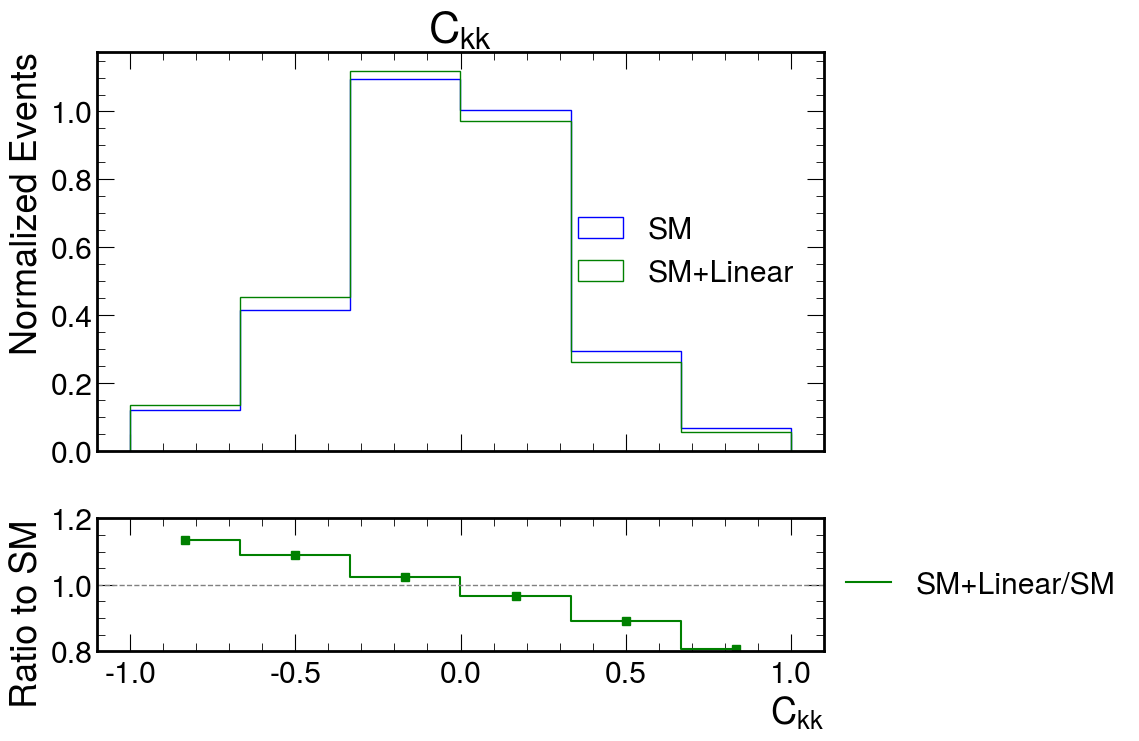

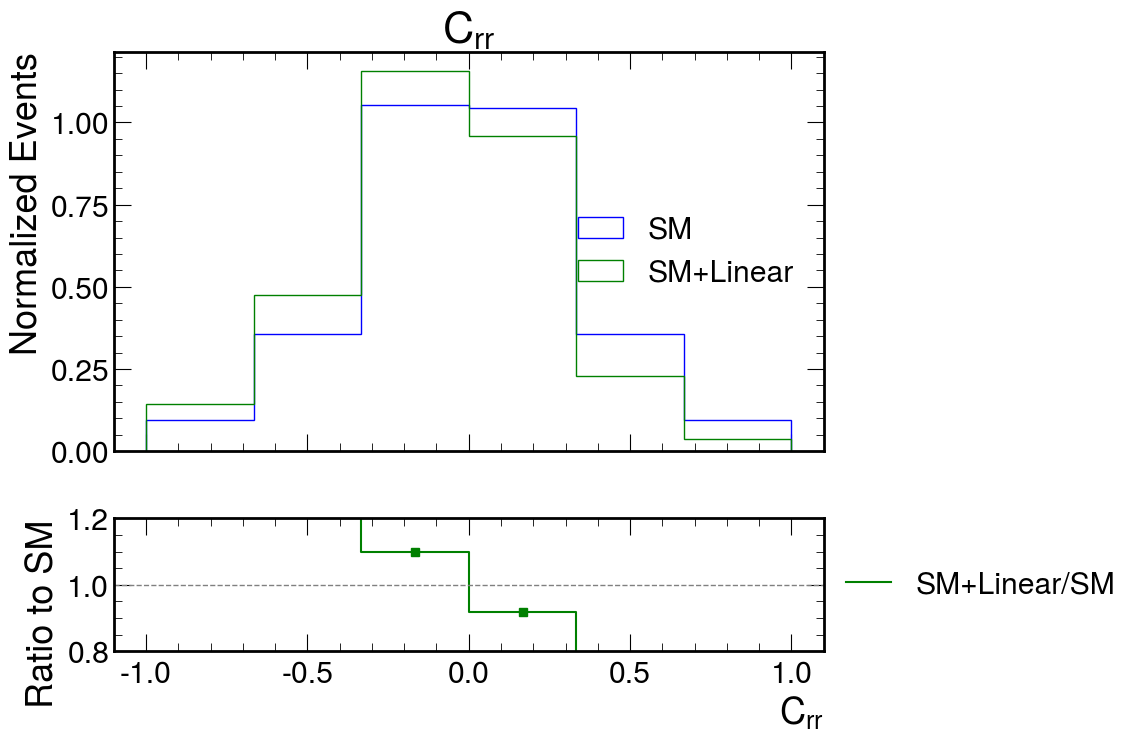

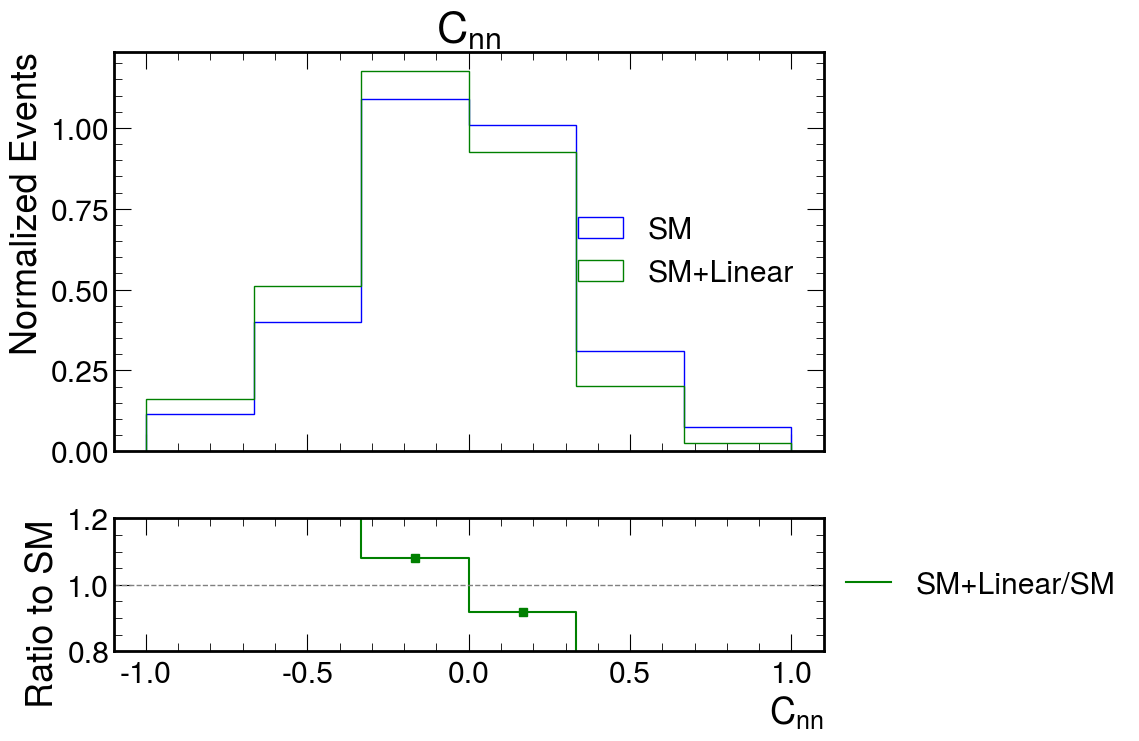

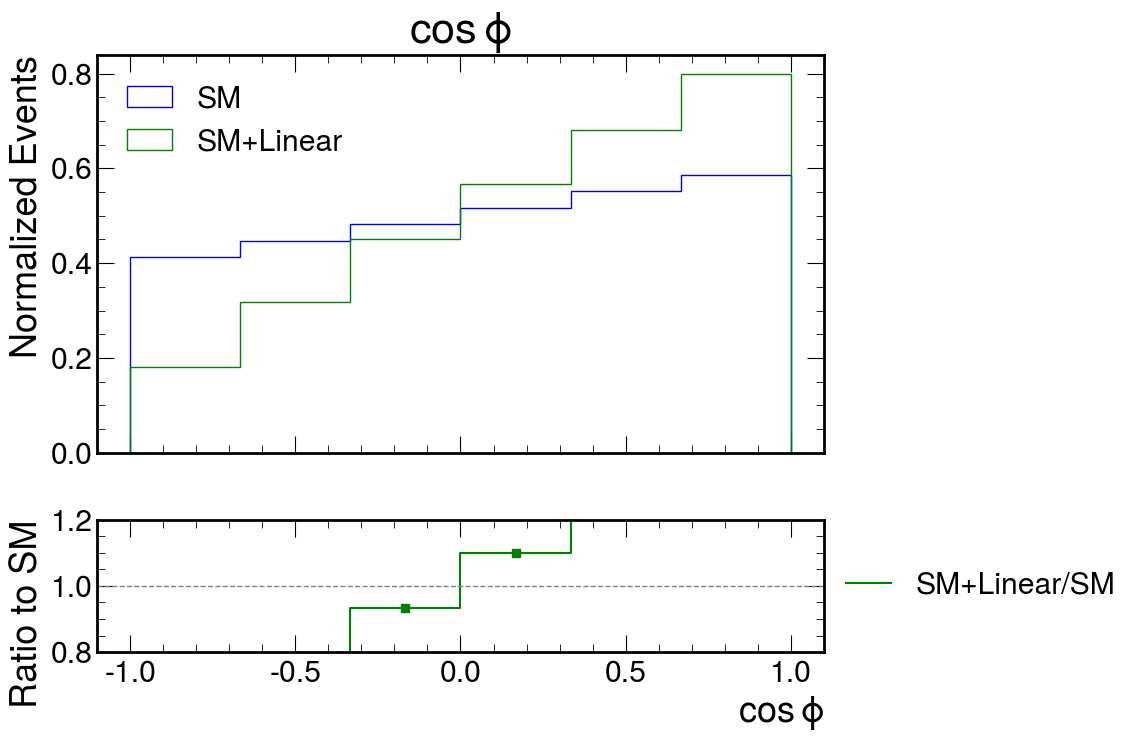

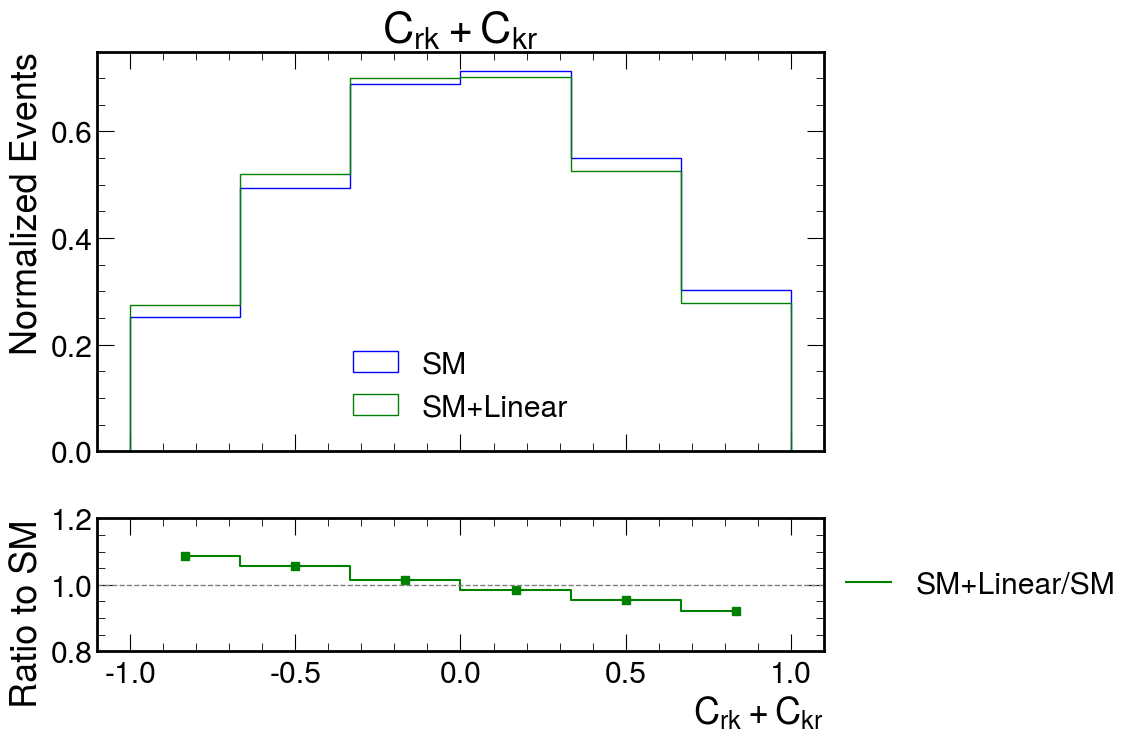

In [116]:
observables_to_plot = {
    # Existing
    'gen_b1k': ('$b_{1k}$', '$b_{1k}$'),
    'gen_b2k': ('$b_{2k}$', '$b_{2k}$'),
    #'gen_b1j': ('$b_{1j}$', '$b_{1j}$'),
    #'gen_b2j': ('$b_{2j}$', '$b_{2j}$'),
    'gen_b1r': ('$b_{1r}$', '$b_{1r}$'),
    'gen_b2r': ('$b_{2r}$', '$b_{2r}$'),
    #'gen_b1q': ('$b_{1q}$', '$b_{1q}$'),
    #'gen_b2q': ('$b_{2q}$', '$b_{2q}$'),
    #'gen_b1n': ('$b_{1n}$', '$b_{1n}$'),
    #'gen_b2n': ('$b_{2n}$', '$b_{2n}$'),
    'gen_c_kk': ('$C_{kk}$', '$C_{kk}$'),
    'gen_c_rr': ('$C_{rr}$', '$C_{rr}$'),
    'gen_c_nn': ('$C_{nn}$', '$C_{nn}$'),
    'gen_ll_cHel': ('$\\cos\\phi$', '$\\cos\\phi$'),
    'gen_crk_ckr': ('$C_{rk}+C_{kr}$', '$C_{rk}+C_{kr}$'),

    # Newly added ttbar observables
    #'gen_ttbar_pt': ('$p_T^{t\\bar{t}}$', '$p_T^{t\\bar{t}}$'),
    #'gen_ttbar_phi': ('$\\phi^{t\\bar{t}}$', '$\\phi^{t\\bar{t}}$'),
    #'gen_ttbar_rapidity': ('$y^{t\\bar{t}}$', '$y^{t\\bar{t}}$'),
    #'gen_ttbar_eta': ('$\\eta^{t\\bar{t}}$', '$\\eta^{t\\bar{t}}$'),
    #'gen_ttbar_delta_phi': ('$\\Delta\\phi_{t\\bar{t}}$', '$\\Delta\\phi_{t\\bar{t}}$'),
    #'gen_ttbar_delta_eta': ('$\\Delta\\eta_{t\\bar{t}}$', '$\\Delta\\eta_{t\\bar{t}}$'),
    #'gen_ttbar_delta_rapidity': ('$\\Delta y_{t\\bar{t}}$', '$\\Delta y_{t\\bar{t}}$'),

    # Newly added llbar observables
    #'gen_llbar_pt': ('$p_T^{\\ell\\bar{\\ell}}$', '$p_T^{\\ell\\bar{\\ell}}$'),
    #'gen_llbar_phi': ('$\\phi^{\\ell\\bar{\\ell}}$', '$\\phi^{\\ell\\bar{\\ell}}$'),
    #'gen_llbar_rapidity': ('$y^{\\ell\\bar{\\ell}}$', '$y^{\\ell\\bar{\\ell}}$'),
    #'gen_llbar_delta_phi': ('$\\Delta\\phi_{\\ell\\bar{\\ell}}$', '$\\Delta\\phi_{\\ell\\bar{\\ell}}$'),
    #'gen_llbar_delta_eta': ('$\\Delta\\eta_{\\ell\\bar{\\ell}}$', '$\\Delta\\eta_{\\ell\\bar{\\ell}}$'),
    #'gen_llbar_delta_rapidity': ('$\\Delta y_{\\ell\\bar{\\ell}}$', '$\\Delta y_{\\ell\\bar{\\ell}}$'),
    #'gen_llbar_mass': ('$m_{\\ell\\bar{\\ell}}$', '$m_{\\ell\\bar{\\ell}}$'),

    # Optional (commented out, add if needed)
    # 'gen_l_pt': ('$p_T^\\ell$', '$p_T^\\ell$'),
    # 'gen_lbar_pt': ('$p_T^{\\bar{\\ell}}$', '$p_T^{\\bar{\\ell}}$'),
    # 'gen_eta': ('$\\eta^\\ell$', '$\\eta^\\ell$'),
    # 'gen_ttbar_mass': ('$m_{t\\bar{t}}$', '$m_{t\\bar{t}}$'),
}

def plot_eft_components_general(obs, xlabel, title, weights_dict, num_bins=6):
    import matplotlib.pyplot as plt
    import numpy as np
    import mplhep as hep
    import awkward as ak
    from itertools import cycle

    # CMS style
    plt.style.use(hep.style.CMS)
    fig, (ax, ax_ratio) = plt.subplots(2, 1, figsize=(12, 8),
                                       gridspec_kw={'height_ratios': [3, 1]}, sharex=True)

    # Convert observable to NumPy
    obs_np = ak.to_numpy(obs)
    min_val = np.min(obs_np)
    max_val = np.max(obs_np)
    bin_edges = np.linspace(min_val, max_val, num_bins + 1)
    bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
    bin_widths = np.diff(bin_edges)

    # Plot styles
    color_list = ['blue', 'green', 'orange', 'red', 'purple', 'brown', 'black']
    marker_list = ['o', 's', 'd', '^', 'v', '<', '>']

    histograms = {}
    normalized = {}

    # Plot main histograms and collect for ratio
    labels = list(weights_dict.keys())
    ref_label = labels[0]
    ref_hist = None
    ref_color = None

    for i, label in enumerate(labels):
        color = color_list[i % len(color_list)]
        weights = weights_dict[label]
        hist, _ = np.histogram(obs_np, bins=bin_edges, weights=weights)
        histograms[label] = hist
        norm = np.sum(hist) if np.sum(hist) != 0 else 1
        normalized[label] = hist / norm
        ax.hist(obs_np, bins=bin_edges, weights=weights, histtype='step',
                color=color, label=label, density=True)
        if i == 0:
            ref_hist = normalized[label]
            ref_color = color

    ax.set_ylabel("Normalized Events")
    ax.set_title(title)
    ax.legend(loc='best')

    # Plot ratios using same colors
    for i, label in enumerate(labels):
        if label == ref_label:
            continue
        ratio = np.divide(normalized[label], ref_hist,
                          out=np.ones_like(ref_hist), where=ref_hist != 0)
        color = color_list[i % len(color_list)]
        marker = marker_list[i % len(marker_list)]
        ax_ratio.step(bin_centers, ratio, where='mid', color=color, label=f'{label}/{ref_label}')
        ax_ratio.plot(bin_centers, ratio, marker=marker, linestyle='none', color=color)

    ax_ratio.set_ylim(0.8, 1.2)
    ax_ratio.set_xlabel(xlabel)
    ax_ratio.set_ylabel("Ratio to " + ref_label)
    ax_ratio.axhline(1, color='gray', linestyle='--', linewidth=1)
    ax_ratio.legend(loc='center left', bbox_to_anchor=(1.01, 0.5), borderaxespad=0.)

    plt.tight_layout()
    plt.show()


weights_dict={
        'SM': sm[mask_file]*cumulative_weights["Order A"],
        'SM+Linear': ctgRe15_lin[mask_file]*cumulative_weights["Order A"]
        #'SM+Quadratic': ctgRe15_quad[mask_file]*cumulative_weights["Order A"]
        #'Total': ctgRe2_total[mask_file]*cumulative_weights["Order A"]
    }
# Plot all observables using the current cumulative weight
for obs_key, (xlabel, title) in observables_to_plot.items():
    plot_eft_components_general(
        filtered_observables[obs_key],
        xlabel,
        f"{title}",
        weights_dict=weights_dict
    )

In [91]:
import numpy as np
from uncertainties import ufloat

# Same mask and observable setup as before
mask_jason = (file_jason['gen_l_pt'] > 0) & (file_jason['gen_lbar_pt'] > 0)

# Define observables (same as your code)
observables = {
    r'$C_{kk}$': file_jason['gen_c_kk'][mask_jason],
    r'$C_{nn}$': file_jason['gen_c_nn'][mask_jason],
    r'$C_{rr}$': file_jason['gen_c_rr'][mask_jason],
    r'$C_{kr}$': file_jason['gen_c_kr'][mask_jason],
    r'$C_{nr}$': file_jason['gen_c_nr'][mask_jason],
    r'$C_{rn}$': file_jason['gen_c_rn'][mask_jason],
    r'$C_{rk}$': file_jason['gen_c_rk'][mask_jason],
    r'$C_{kn}$': file_jason['gen_c_kn'][mask_jason],
    r'$C_{nk}$': file_jason['gen_c_nk'][mask_jason],
    r'$C_{rk}+C_{kr}$': file_jason['gen_c_rk'][mask_jason] + file_jason['gen_c_kr'][mask_jason],
    r'$C_{nk}+C_{kn}$': file_jason['gen_c_nk'][mask_jason] + file_jason['gen_c_kn'][mask_jason],
    r'$C_{nr}+C_{rn}$': file_jason['gen_c_nr'][mask_jason] + file_jason['gen_c_rn'][mask_jason],
    r'$C_{rk}-C_{kr}$': file_jason['gen_c_rk'][mask_jason] - file_jason['gen_c_kr'][mask_jason],
    r'$C_{nk}-C_{kn}$': file_jason['gen_c_nk'][mask_jason] - file_jason['gen_c_kn'][mask_jason],
    r'$C_{nr}-C_{rn}$': file_jason['gen_c_nr'][mask_jason] - file_jason['gen_c_rn'][mask_jason],
    r'$D$': file_jason['gen_ll_cHel'][mask_jason]
}
b_observables = {
    r'$B_1^k$': file_jason['gen_b1k'][mask_jason],
    r'$B_2^k$': file_jason['gen_b2k'][mask_jason],
    r'$B_1^j$': file_jason['gen_b1j'][mask_jason],
    r'$B_2^j$': file_jason['gen_b2j'][mask_jason],
    r'$B_1^r$': file_jason['gen_b1r'][mask_jason],
    r'$B_2^r$': file_jason['gen_b2r'][mask_jason],
    r'$B_1^q$': file_jason['gen_b1q'][mask_jason],
    r'$B_2^q$': file_jason['gen_b2q'][mask_jason],
    r'$B_1^n$': file_jason['gen_b1n'][mask_jason],
    r'$B_2^n$': file_jason['gen_b2n'][mask_jason]
}

observables.update(b_observables)
weights = file_jason['trueLevelWeight'][mask_jason]

# Constants
constant_factor_Cij = -4.0
constant_factor_CijCji = -16 / np.pi
constant_factor_D = -2
constant_factor_b = 2

# Binned asymmetry function
def binned_assy(obs, weights, bins=20, range_=(-1, 1)):
    bin_centers = 0.5 * (np.linspace(*range_, bins + 1)[:-1] + np.linspace(*range_, bins + 1)[1:])
    hist, bin_edges = np.histogram(obs, bins=bins, range=range_, weights=weights)
    hist_err = np.sqrt(np.histogram(obs, bins=bins, range=range_, weights=weights**2)[0])

    # Positive and negative contributions
    pos = bin_centers > 0
    neg = bin_centers < 0

    N1 = ufloat(np.sum(hist[pos]), np.sqrt(np.sum(hist_err[pos]**2)))
    N2 = ufloat(np.sum(hist[neg]), np.sqrt(np.sum(hist_err[neg]**2)))
    A = (N1 - N2) / (N1 + N2)
    return N1, N2, A

# Results dictionary
binned_asymmetry_results = {}

for obs_name, obs_data in observables.items():
    if obs_name.strip('$') == 'D':
        constant_factor = constant_factor_D
    elif "+" in obs_name or "-" in obs_name:
        constant_factor = constant_factor_CijCji
    elif "B_" in obs_name:
        constant_factor = constant_factor_b
    else:
        constant_factor = constant_factor_Cij

    N1, N2, A = binned_assy(obs_data, weights)
    param_val = constant_factor * A
    binned_asymmetry_results[obs_name] = { 'parameter value': param_val }

# Format nicely
Results_jason_powheg = {
    obs_name: (values['parameter value'].nominal_value, values['parameter value'].std_dev)
    for obs_name, values in binned_asymmetry_results.items()
}
Results_jason_powheg

{'$C_{kk}$': (0.30783054573006247, 0.0008617092851219719),
 '$C_{nn}$': (0.31609823922415436, 0.000861552407085233),
 '$C_{rr}$': (0.04180026813730733, 0.0008642059582149332),
 '$C_{kr}$': (-0.10407752773498556, 0.0008639595870833039),
 '$C_{nr}$': (0.0020080664855044745, 0.0008642522025280191),
 '$C_{rn}$': (0.00017458003462746024, 0.0008642522510178749),
 '$C_{rk}$': (-0.10169155864020271, 0.00086397173643392),
 '$C_{kn}$': (0.0017224008427269382, 0.0008642523178533034),
 '$C_{nk}$': (0.00040584273909179494, 0.0008642524086126456),
 '$C_{rk}+C_{kr}$': (-0.2055608795784628, 0.0010995019187518998),
 '$C_{nk}+C_{kn}$': (0.0008154885090194145, 0.0011004003810531407),
 '$C_{nr}+C_{rn}$': (0.0019256025621476912, 0.0011004001348145814),
 '$C_{rk}-C_{kr}$': (0.003941427263744856, 0.0011004000027075354),
 '$C_{nk}-C_{kn}$': (-0.0011813995908021493, 0.0011004002017546482),
 '$C_{nr}-C_{rn}$': (0.0012044179873141473, 0.0011004001740922906),
 '$D$': (-0.22225758763826914, 0.0004294647243692312),

In [140]:
import numpy as np
from uncertainties import ufloat
mask_file = (file['gen_l_pt'] > 1) & (file['gen_lbar_pt'] > 1)
# Observable definitions
observables = {
    r'$C_{kk}$': file['gen_c_kk'][mask_file],
    r'$C_{nn}$': file['gen_c_nn'][mask_file],
    r'$C_{rr}$': file['gen_c_rr'][mask_file],
    r'$C_{kr}$': file['gen_c_kr'][mask_file],
    r'$C_{nr}$': file['gen_c_nr'][mask_file],
    r'$C_{rn}$': file['gen_c_rn'][mask_file],
    r'$C_{rk}$': file['gen_c_rk'][mask_file],
    r'$C_{kn}$': file['gen_c_kn'][mask_file],
    r'$C_{nk}$': file['gen_c_nk'][mask_file],
    r'$C_{rk}+C_{kr}$': file['gen_c_rk'][mask_file] + file['gen_c_kr'][mask_file],
    r'$C_{nk}+C_{kn}$': file['gen_c_nk'][mask_file] + file['gen_c_kn'][mask_file],
    r'$C_{nr}+C_{rn}$': file['gen_c_nr'][mask_file] + file['gen_c_rn'][mask_file],
    r'$C_{rk}-C_{kr}$': file['gen_c_rk'][mask_file] - file['gen_c_kr'][mask_file],
    r'$C_{nk}-C_{kn}$': file['gen_c_nk'][mask_file] - file['gen_c_kn'][mask_file],
    r'$C_{nr}-C_{rn}$': file['gen_c_nr'][mask_file] - file['gen_c_rn'][mask_file],
    r'$D$': file['gen_ll_cHel'][mask_file]
}

# B coefficients with superscript notation
b_observables = {
    r'$B_1^k$': file['gen_b1k'][mask_file],
    r'$B_2^k$': file['gen_b2k'][mask_file],
    r'$B_1^j$': file['gen_b1j'][mask_file],
    r'$B_2^j$': file['gen_b2j'][mask_file],
    r'$B_1^r$': file['gen_b1r'][mask_file],
    r'$B_2^r$': file['gen_b2r'][mask_file],
    r'$B_1^q$': file['gen_b1q'][mask_file],
    r'$B_2^q$': file['gen_b2q'][mask_file],
    r'$B_1^n$': file['gen_b1n'][mask_file],
    r'$B_2^n$': file['gen_b2n'][mask_file],
}


observables.update(b_observables)

# Weights
truelevel_weight = file['trueLevelWeight'][mask_file]
weight_sm_reweighted = current_weights
final_weights = truelevel_weight * weight_sm_reweighted

# Constants
constant_factor_Cij = -4.0  
constant_factor_CijCji = -16 / np.pi  
constant_factor_D = -2
constant_factor_b = 2

# Binned asymmetry calculator
def binned_assy(obs, weights, bins=20, range_=(-1, 1)):
    bin_centers = 0.5 * (np.linspace(*range_, bins + 1)[:-1] + np.linspace(*range_, bins + 1)[1:])
    hist, _ = np.histogram(obs, bins=bins, range=range_, weights=weights)
    hist_err = np.sqrt(np.histogram(obs, bins=bins, range=range_, weights=weights**2)[0])

    pos = bin_centers > 0
    neg = bin_centers < 0

    N1 = ufloat(np.sum(hist[pos]), np.sqrt(np.sum(hist_err[pos]**2)))
    N2 = ufloat(np.sum(hist[neg]), np.sqrt(np.sum(hist_err[neg]**2)))
    A = (N1 - N2) / (N1 + N2)
    return N1, N2, A

# Run the asymmetry calculations
binned_asymmetry_results_reweighted = {}

for obs_name, obs_data in observables.items():
    if obs_name.strip('$') == 'D':
        constant_factor = constant_factor_D
    elif "+" in obs_name or "-" in obs_name:
        constant_factor = constant_factor_CijCji
    elif "C_" in obs_name or "C{" in obs_name:
        constant_factor = constant_factor_Cij
    else:
        constant_factor = constant_factor_b

    N1, N2, A = binned_assy(obs_data, final_weights)
    param_val = constant_factor * A
    binned_asymmetry_results_reweighted[obs_name] = { 'parameter value': param_val }

# Format results into (nominal, uncertainty)
Results_reweighted = {
    obs_name: (val['parameter value'].nominal_value, val['parameter value'].std_dev)
    for obs_name, val in binned_asymmetry_results_reweighted.items()
}

Results_reweighted

{'$C_{kk}$': (0.3252126404158644, 0.0010518225482704442),
 '$C_{nn}$': (0.31487764060701945, 0.0010559587266319127),
 '$C_{rr}$': (0.05771046951084306, 0.0010580087299320775),
 '$C_{kr}$': (-0.11008107452579573, 0.0010578309112056802),
 '$C_{nr}$': (0.0006091598342395656, 0.0010582506011639278),
 '$C_{rn}$': (4.59221644649568e-05, 0.0010582529384977931),
 '$C_{rk}$': (-0.10911782153038303, 0.001057830888583174),
 '$C_{kn}$': (0.0007601362103192634, 0.001058253361390266),
 '$C_{nk}$': (-0.0006233031529881032, 0.0010582532402956429),
 '$C_{rk}+C_{kr}$': (-0.2183074165863685, 0.0013460983802253549),
 '$C_{nk}+C_{kn}$': (-0.00034487676953701997, 0.0013474092885076795),
 '$C_{nr}+C_{rn}$': (0.0012717504754064344, 0.001347409257746134),
 '$C_{rk}-C_{kr}$': (-0.0007381957035312684, 0.0013474092252405167),
 '$C_{nk}-C_{kn}$': (-0.0005920598068315214, 0.0013474100244430748),
 '$C_{nr}-C_{rn}$': (-0.0005566792405803927, 0.0013474124802505126),
 '$D$': (-0.22969943574424753, 0.0005244625584288286

In [141]:
# Measured values extracted manually from image (nominal, uncertainty)
measured_data = {
    r'$B_1^k$': (0.005, 0.023),
    r'$B_2^k$': (0.007, 0.023),
    r'$B_1^r$': (-0.023, 0.017),
    r'$B_2^r$': (-0.010, 0.020),
    r'$B_1^n$': (0.006, 0.013),
    r'$B_2^n$': (0.017, 0.013),
    # r'$B_1^j$': (-0.016, 0.018),
    # r'$B_2^j$': (0.007, 0.019),
    # r'$B_1^q$': (0.001, 0.017),
    # r'$B_2^q$': (0.010, 0.017),
    r'$C_{kk}$': (0.300, 0.038),
    r'$C_{rr}$': (0.081, 0.032),
    r'$C_{nn}$': (0.329, 0.020),
    #r'$C_{rk}+C_{kr}$': (-0.193, 0.064),
    #r'$C_{nr}+C_{rn}$': (-0.004, 0.037),
    #r'$C_{nk}+C_{kn}$': (-0.043, 0.041),
    #r'$C_{rk}-C_{kr}$': (0.057, 0.046),
    #r'$C_{nr}-C_{rn}$': (-0.001, 0.038),
    #r'$C_{nk}-C_{kn}$': (0.04, 0.029),
    # r'$D$': (-0.237, 0.011)
}


LO_values = {
    r'$B_1^k$': (0.001, 0.000),
    r'$B_2^k$': (0.000, 0.000),
    r'$B_1^r$': (0.000, 0.000),
    r'$B_2^r$': (0.000, 0.000),
    r'$B_1^n$': (0.001, 0.000),
    r'$B_2^n$': (0.000, 0.000),
    r'$C_{kk}$': (0.324, 0.007),
    r'$C_{rr}$': (0.006, 0.005),
    r'$C_{nn}$': (0.332, 0.001),
    #r'$C_{rk}+C_{kr}$': (-0.229, 0.004),
    #r'$C_{nr}+C_{rn}$': (0.001, 0.000),
    #r'$C_{nk}+C_{kn}$': (0.000, 0.000),
    #r'$C_{rk}-C_{kr}$': (0.001, 0.000),
    #r'$C_{nr}-C_{rn}$': (0.000, 0.000),
    #r'$C_{nk}-C_{kn}$': (0.001, 0.000),
    #r'$D$': (-0.233, 0.004)
}
NLO_values = {
    r'$B_1^k$': (0.001, 0.000),
    r'$B_2^k$': (0.000, 0.000),
    r'$B_1^r$': (0.000, 0.000),
    r'$B_2^r$': (0.000, 0.000),
    r'$B_1^n$': (0.003, 0.001),
    r'$B_2^n$': (-0.002, 0.000),
    #r'$B_1^j$': (0.000, 0.001),
    #r'$B_2^j$': (0.003, 0.002),
    #r'$B_1^q$': (0.000, 0.001),
    #r'$B_2^q$': (0.001, 0.001),
    r'$C_{kk}$': (0.330, 0.002),
    r'$C_{rr}$': (0.058, 0.018),
    r'$C_{nn}$': (0.330, 0.001),
    #r'$C_{rk}+C_{kr}$': (-0.203, 0.009),
    #r'$C_{nr}+C_{rn}$': (-0.001, 0.001),
    #r'$C_{nk}+C_{kn}$': (0.002, 0.001),
    #r'$C_{rk}-C_{kr}$': (0.001, 0.001),
    #r'$C_{nr}-C_{rn}$': (-0.001, 0.001),
    #r'$C_{nk}-C_{kn}$': (0.001, 0.001),
    #r'$D$': (-0.233, 0.004)
}
observable_name_map = {
    r'$B_1^k$': r'$B_1^k$',
    r'$B_2^k$': r'$B_2^k$',
    r'$B_1^r$': r'$B_1^r$',
    r'$B_2^r$': r'$B_2^r$',
    r'$B_1^n$': r'$B_1^n$',
    r'$B_2^n$': r'$B_2^n$',
    r'$B_1^j$': r'$B_1^j$',
    r'$B_2^j$': r'$B_2^j$',
    r'$B_1^q$': r'$B_1^q$',
    r'$B_2^q$': r'$B_2^q$',
    r'$C_{kk}$': r'$C_{kk}$',
    r'$C_{rr}$': r'$C_{rr}$',
    r'$C_{nn}$': r'$C_{nn}$',
    r'$C_{kr}+C_{rk}$': r'$C_{kr}+C_{rk}$',
    r'$C_{rn}+C_{nr}$': r'$C_{rn}+C_{nr}$',
    r'$C_{kn}+C_{nk}$': r'$C_{kn}+C_{nk}$',
    r'$D$': r'$D$'
}

Plot saved to /depot/cms/top/bhanda25/EFT_minitree/Saved_plots/polarization_plot_mtt_inclusive2.png
Plot saved to /depot/cms/top/bhanda25/EFT_minitree/Saved_plots/spin_corr_plot_mtt_inclusive2.png


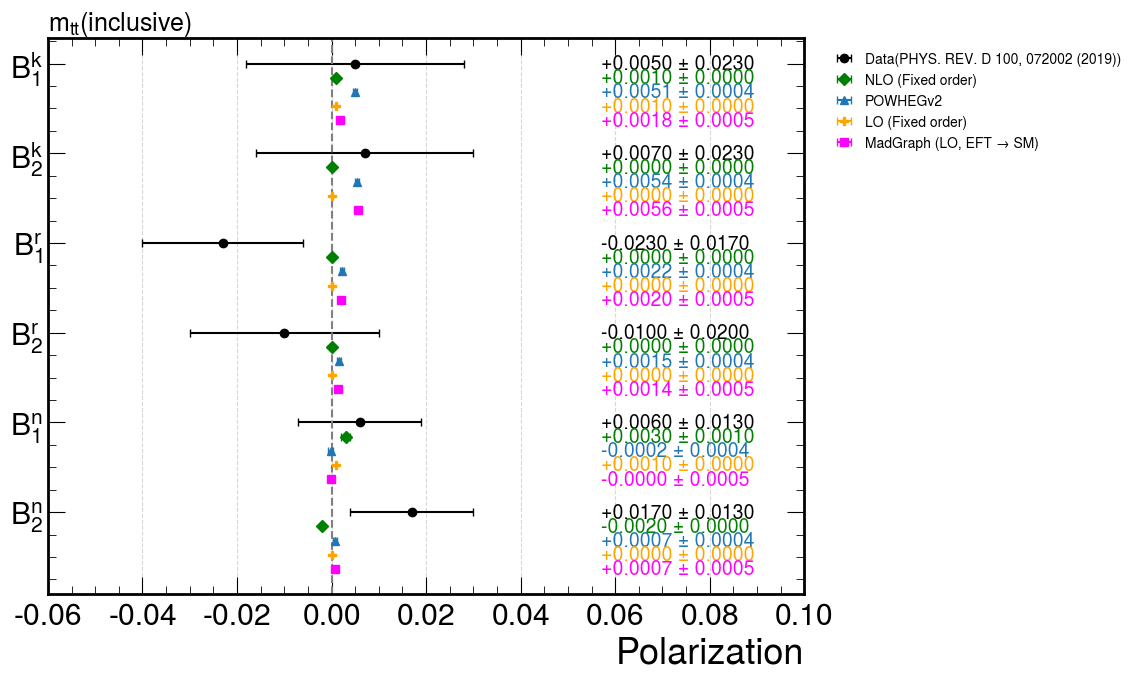

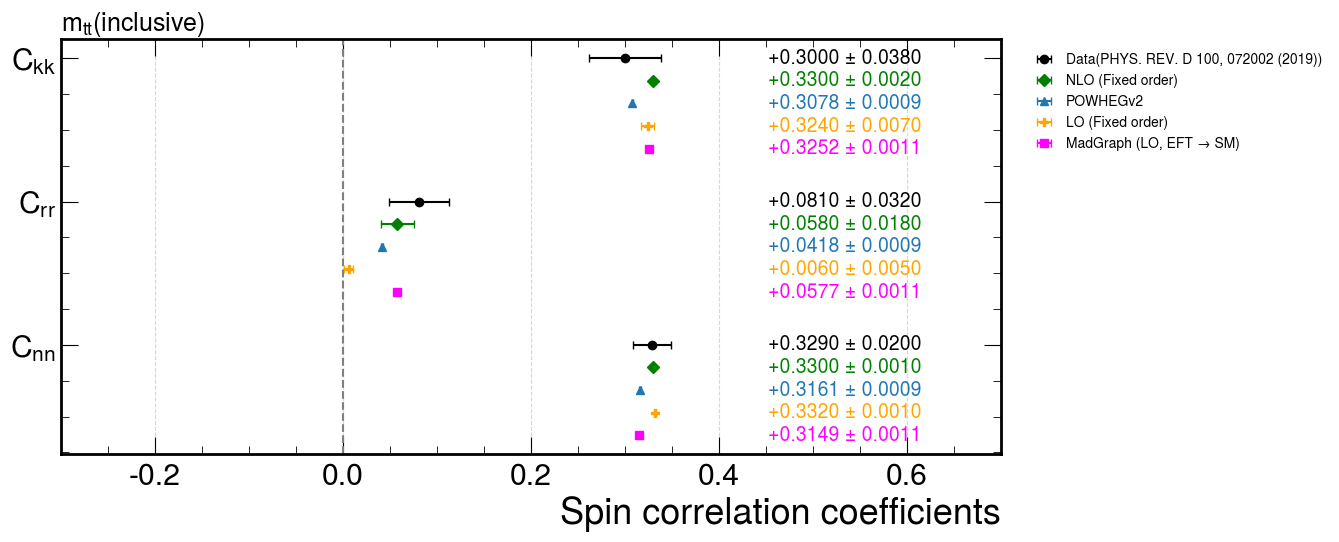

In [142]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Categorize observables
polarization_obs_final = [k for k in measured_data if 'B_' in k]
spin_correlation_obs = [k for k in measured_data if k not in polarization_obs_final]

def plot_comparison_with_values(observable_list, xlabel, title, save_dir, xlim, filename=None):
    if not observable_list:
        print(f"Skipping plot for '{xlabel}' — no observables provided.")
        return

    observable_list = list(reversed(observable_list))
    spacing = 1.9
    y_pos = np.arange(len(observable_list)) * spacing

    # Extract values from all sources
    def extract(source): return [source.get(o, (np.nan, np.nan))[0] for o in observable_list]
    def extract_err(source): return [source.get(o, (np.nan, np.nan))[1] for o in observable_list]

    madgraph_nom, madgraph_err = extract(Results_reweighted), extract_err(Results_reweighted)
    powheg_nom, powheg_err = extract(Results_jason_powheg), extract_err(Results_jason_powheg)
    measured_nom, measured_err = extract(measured_data), extract_err(measured_data)
    LO_nom, LO_err = extract(LO_values), extract_err(LO_values)
    NLO_nom, NLO_err = extract(NLO_values), extract_err(NLO_values)

    # --- Set figure size based on xlabel ---
    if "Spin correlation coefficients" in xlabel:
        fig, ax = plt.subplots(figsize=(14, len(observable_list) * 1.0 + 3))  # Wider for spin correlation
    else:
        fig, ax = plt.subplots(figsize=(12, len(observable_list) * 0.9 + 2))  # Default for polarization
    # -----------------------------------------


    # Plot each prediction with error bars
    ax.errorbar(measured_nom, y_pos, xerr=measured_err, fmt='o', color='black',label="Data(PHYS. REV. D 100, 072002 (2019))", capsize=3)
    ax.errorbar(NLO_nom, y_pos - 0.3, xerr=NLO_err, fmt='D', color='green', label="NLO (Fixed order)", capsize=3)
    ax.errorbar(powheg_nom, y_pos-0.6, xerr=powheg_err, fmt='^', color='tab:blue', label="POWHEGv2", capsize=3)
    ax.errorbar(LO_nom, y_pos - 0.9, xerr=LO_err, fmt='P', color='orange', label="LO (Fixed order)", capsize=3)
    ax.errorbar(madgraph_nom, y_pos - 1.2, xerr=madgraph_err, fmt='s', color='magenta', label="MadGraph (LO, EFT → SM)", capsize=3)   

    # Annotate values next to each point
    x_max = max(np.nanmax(arr) for arr in [madgraph_nom, powheg_nom, measured_nom, LO_nom, NLO_nom])
    label_x = x_max + 0.1

    for i in range(len(observable_list)):
        shift = 0.02 if "C_" in observable_list[i] or "D" in observable_list[i] else -0.06  # horizontal shift for spin correlations
    
        ax.text(label_x + shift, y_pos[i],            f"{measured_nom[i]:+.4f} ± {measured_err[i]:.4f}",
                va='center', ha='left', fontsize=14, color='black')
        ax.text(label_x + shift, y_pos[i] - 0.3,       f"{NLO_nom[i]:+.4f} ± {NLO_err[i]:.4f}",
                va='center', ha='left', fontsize=14, color='green')
        ax.text(label_x + shift, y_pos[i] - 0.6,       f"{powheg_nom[i]:+.4f} ± {powheg_err[i]:.4f}",
                va='center', ha='left', fontsize=14, color='tab:blue')
        ax.text(label_x + shift, y_pos[i] - 0.9,       f"{LO_nom[i]:+.4f} ± {LO_err[i]:.4f}",
                va='center', ha='left', fontsize=14, color='orange')
        ax.text(label_x + shift, y_pos[i] - 1.2,       f"{madgraph_nom[i]:+.4f} ± {madgraph_err[i]:.4f}",
                va='center', ha='left', fontsize=14, color='magenta')

    # Axis formatting
    ax.set_yticks(y_pos)
    ax.set_yticklabels(observable_list)
    ax.axvline(0, color='gray', linestyle='--')
    ax.set_xlabel(xlabel)
    ax.set_title(title, fontsize=18, loc='left')
    ax.grid(True, axis='x', linestyle='--', alpha=0.5)
    ax.set_xlim(xlim)
    ax.legend(fontsize=10, loc='upper left', bbox_to_anchor=(1.02, 1.0))
    plt.tight_layout()

    # Save or show plot
    if filename and save_dir:
        os.makedirs(save_dir, exist_ok=True)
        full_path = os.path.join(save_dir, filename)
        plt.savefig(full_path, bbox_inches='tight')
        print(f"Plot saved to {full_path}")
    else:
        plt.show()

# Save directory for output plots
save_directory = '/depot/cms/top/bhanda25/EFT_minitree/Saved_plots'

# Generate plots
plot_comparison_with_values(
    polarization_obs_final,
    xlabel="Polarization",
    title=r"$ m_{tt} $(inclusive) ",
    save_dir=save_directory,
    xlim=(-0.06, 0.1),
    filename="polarization_plot_mtt_inclusive2.png"
)

plot_comparison_with_values(
    spin_correlation_obs,
    xlabel="Spin correlation coefficients",
    title=r"$ m_{tt} $(inclusive)",
    save_dir=save_directory,
    xlim=(-0.3, 0.70),
    filename="spin_corr_plot_mtt_inclusive2.png"
)
